# Project 4

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

## Question 1.1
Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report
which features have the highest absolute correlation with the target variable. In
the context of either dataset, describe what the correlation patterns suggest.

In [ ]:
project_path = '/content/drive/MyDrive/Colab Notebooks/ECE219_Project4/'
file_path = project_path + 'diamonds_ece219.csv'
dataset = pd.read_csv(file_path)
dataset_org = pd.read_csv(file_path)
dataset

,Unnamed: 0,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149866,212615,G,VS1,2.01,Excellent,Excellent,Excellent,63.0,59.0,7.98,8.03,5.05,STK,STK,31984
149867,212616,F,VS2,1.90,Excellent,Excellent,Excellent,62.7,57.0,7.82,7.87,4.92,unknown,unknown,31989
149868,212617,I,VVS1,2.45,Excellent,Excellent,Excellent,61.2,60.0,8.58,8.65,5.28,unknown,unknown,31989
149869,212619,J,VVS2,2.50,Excellent,Excellent,Excellent,59.1,62.0,8.80,8.85,5.22,M,STK,31992


In [ ]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
dataset[categorical_columns] = dataset[categorical_columns].replace('unknown', 'placeholder')
label_encoder = LabelEncoder()
for column in categorical_columns:
    dataset[column + '_encoded'] = label_encoder.fit_transform(dataset[column])
dataset = dataset.drop(columns=categorical_columns)
dataset = dataset.replace('placeholder', 0)
dataset

,Unnamed: 0,carat,depth_percent,table_percent,length,width,depth,price,color_encoded,clarity_encoded,cut_encoded,symmetry_encoded,polish_encoded,girdle_min_encoded,girdle_max_encoded
0,0,0.09,62.7,59.0,2.85,2.87,1.79,200,1,9,0,1,1,0,0
1,1,0.09,61.9,59.0,2.84,2.89,1.78,200,1,9,1,1,1,1,1
2,2,0.09,61.1,59.0,2.88,2.90,1.77,200,1,9,0,1,1,4,0
3,3,0.09,62.0,59.0,2.86,2.88,1.78,200,1,9,0,1,1,0,1
4,4,0.09,64.9,58.5,2.79,2.83,1.82,200,1,9,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149866,212615,2.01,63.0,59.0,7.98,8.03,5.05,31984,3,6,0,0,0,1,1
149867,212616,1.90,62.7,57.0,7.82,7.87,4.92,31989,2,7,0,0,0,9,9
149868,212617,2.45,61.2,60.0,8.58,8.65,5.28,31989,5,8,0,0,0,9,9
149869,212619,2.50,59.1,62.0,8.80,8.85,5.22,31992,6,9,0,0,0,0,1


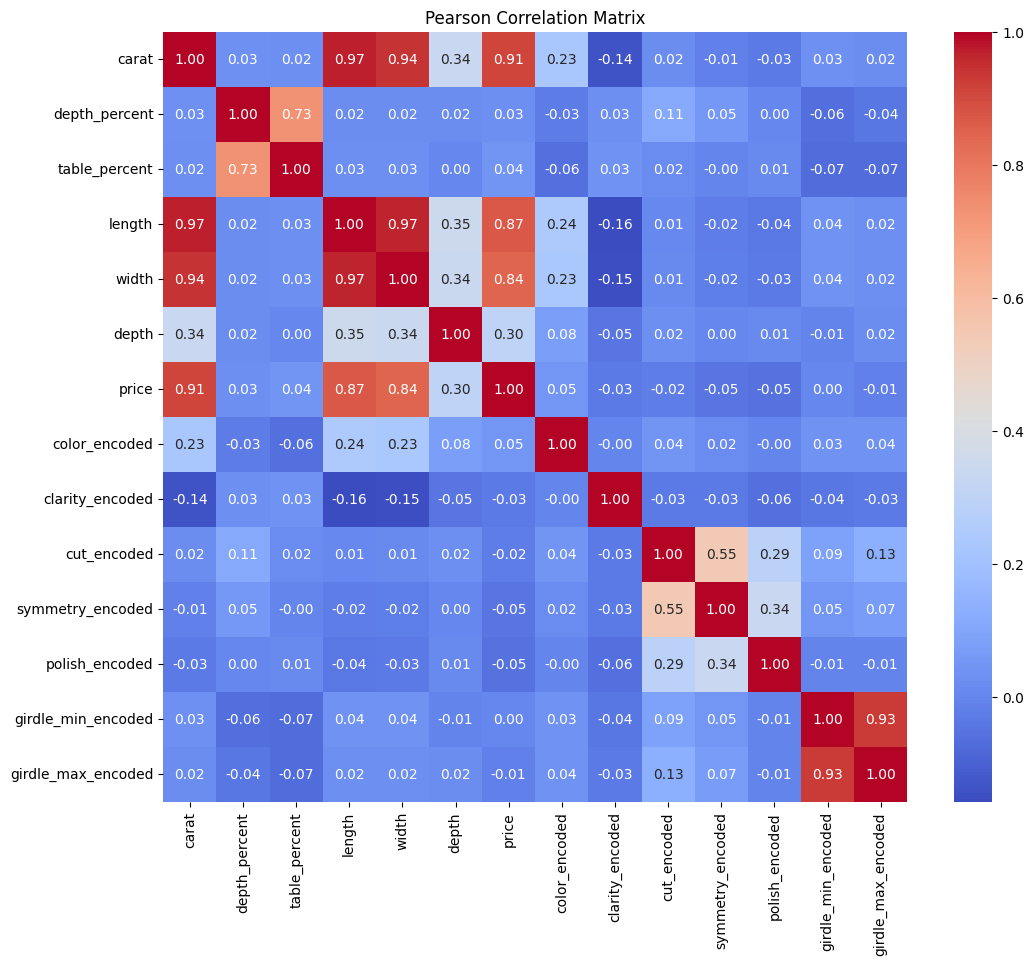



The feature with the highest absolute correlation with the target variable is: carat


In [ ]:
dataset_corr = dataset.drop(columns=['Unnamed: 0'], errors='ignore')
correlation_matrix = dataset_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()
target_correlation = correlation_matrix['price'].abs()
max_correlated_feature = target_correlation.drop('price').idxmax()
print(f"\n\nThe feature with the highest absolute correlation with the target variable is: {max_correlated_feature}")

## Question 1.2
Plot the histogram of numerical features. What preprocessing can be done if the
distribution of a feature has high skewness?

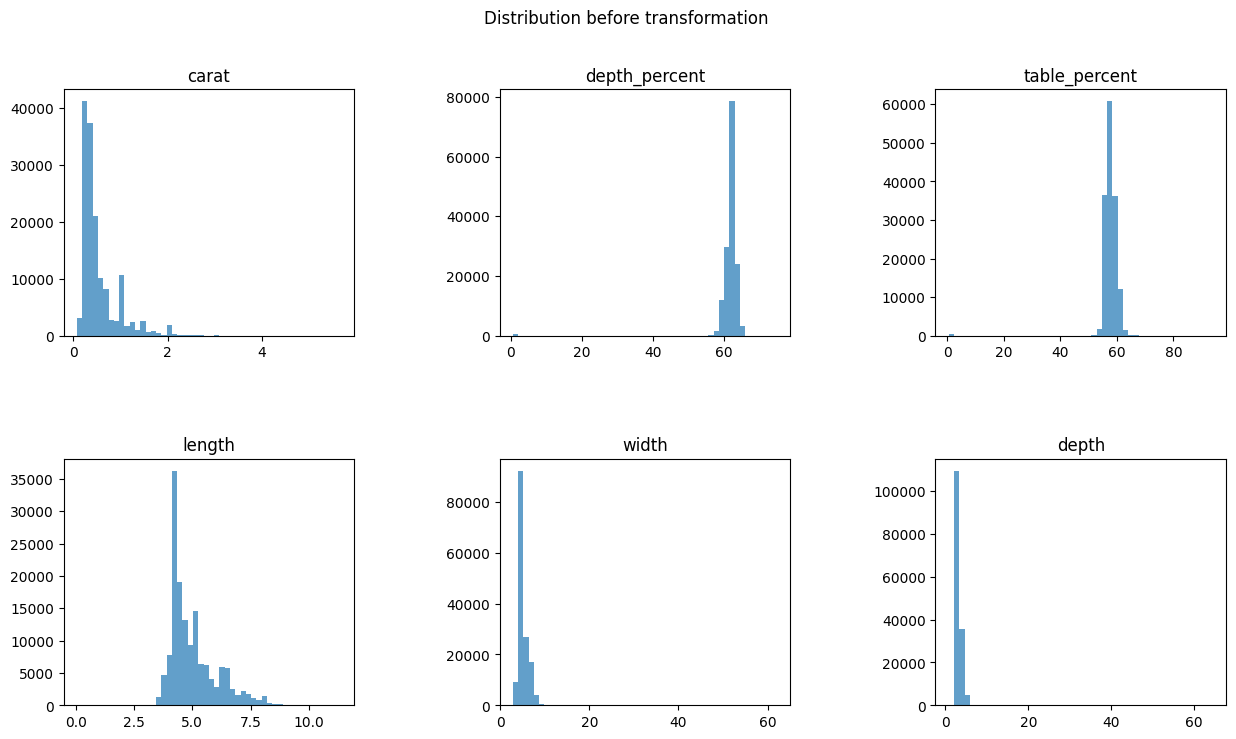

Skewness of numerical features:
carat             2.331750
depth_percent   -13.559472
table_percent   -11.046453
length            1.283591
width             4.115307
depth            27.493024
price             3.071707
dtype: float64


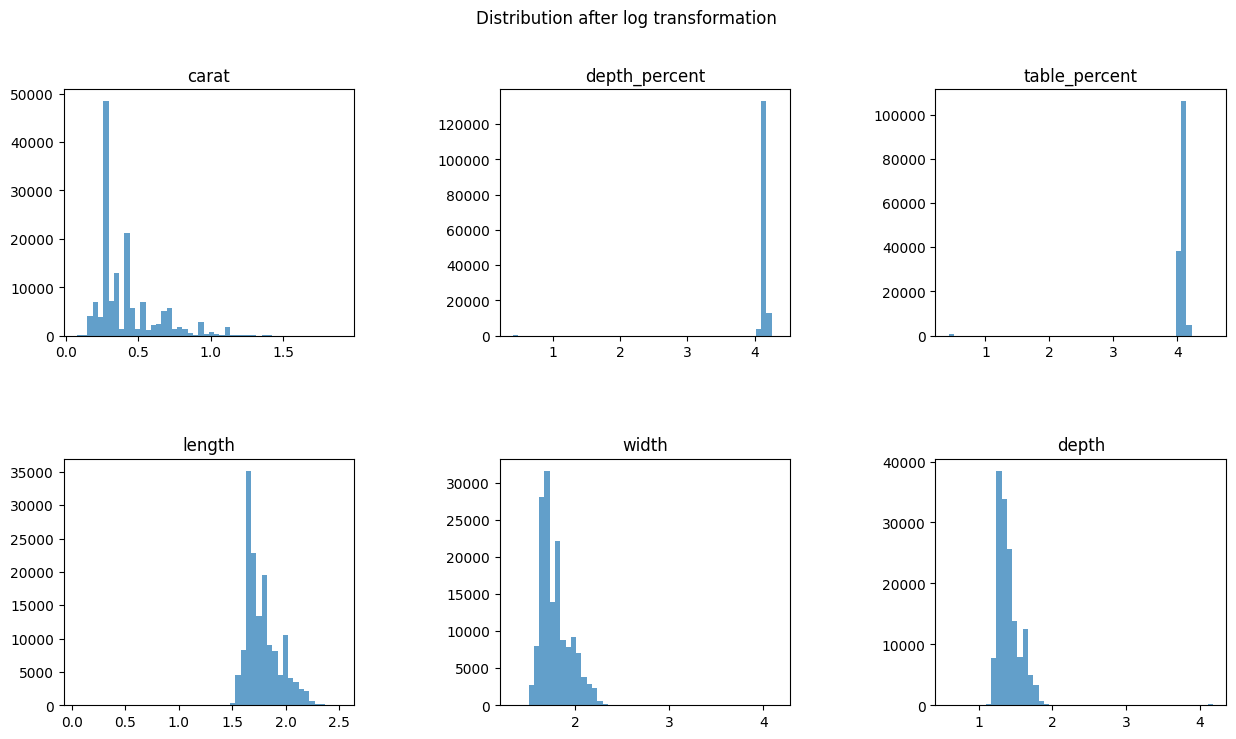

In [ ]:
dataset_num = pd.read_csv(file_path)
numerical_features = dataset_num.select_dtypes(include=[np.number])
numerical_features = numerical_features.drop(columns=['Unnamed: 0'], errors='ignore')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_features.columns):
        ax.hist(dataset[numerical_features.columns[i]], bins=50, alpha=0.7)
        ax.set_title(numerical_features.columns[i])
fig.suptitle("Distribution before transformation")
plt.show()

skewness = numerical_features.apply(lambda x: skew(x))
print("Skewness of numerical features:")
print(skewness)
highly_skewed_features = skewness[abs(skewness) > 0.5].index
for feature in highly_skewed_features:
    dataset[feature] = np.log1p(dataset[feature])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_features.columns):
        ax.hist(dataset[numerical_features.columns[i]], bins=50, alpha=0.7)
        ax.set_title(numerical_features.columns[i])
fig.suptitle("Distribution after log transformation")
plt.show()

**Answer:**

The histogram of numerical features are shown above.

We could use the log transformation to reduce the high skewness during preprocessing.

## Question 1.3
Construct and inspect the box plot of categorical features vs target variable. What do you find?

In [ ]:
# change columns to data type 'object'
word_columns = ['color_encoded', 'clarity_encoded', 'cut_encoded', 'symmetry_encoded', 'polish_encoded', 'girdle_min_encoded',
       'girdle_max_encoded']
dataset_box = dataset.drop(columns=['Unnamed: 0'], errors='ignore')
dataset_box[word_columns] = dataset_box[word_columns].astype('object')
dataset_box

,carat,depth_percent,table_percent,length,width,depth,price,color_encoded,clarity_encoded,cut_encoded,symmetry_encoded,polish_encoded,girdle_min_encoded,girdle_max_encoded
0,0.086178,4.154185,4.094345,1.348073,1.353255,1.026042,5.303305,1,9,0,1,1,0,0
1,0.086178,4.141546,4.094345,1.345472,1.358409,1.022451,5.303305,1,9,1,1,1,1,1
2,0.086178,4.128746,4.094345,1.355835,1.360977,1.018847,5.303305,1,9,0,1,1,4,0
3,0.086178,4.143135,4.094345,1.350667,1.355835,1.022451,5.303305,1,9,0,1,1,0,1
4,0.086178,4.188138,4.085976,1.332366,1.342865,1.036737,5.303305,1,9,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149866,1.101940,4.158883,4.094345,2.195000,2.200552,1.800058,10.373022,3,6,0,0,0,1,1
149867,1.064711,4.154185,4.060443,2.177022,2.182675,1.778336,10.373179,2,7,0,0,0,9,9
149868,1.238374,4.130355,4.110874,2.259678,2.266958,1.837370,10.373179,5,8,0,0,0,9,9
149869,1.252763,4.096010,4.143135,2.282382,2.287471,1.827770,10.373272,6,9,0,0,0,0,1


'girdle_min_encoded' and 'girdle_max_encoded' demonstrate a substantial correlation with prices, suggesting a more pronounced influence of these specific categorical features on the pricing variations. The other majority of categorical features exhibit minimal correlation with prices.

Index(['color_encoded', 'clarity_encoded', 'cut_encoded', 'symmetry_encoded',
       'polish_encoded', 'girdle_min_encoded', 'girdle_max_encoded'],
      dtype='object')


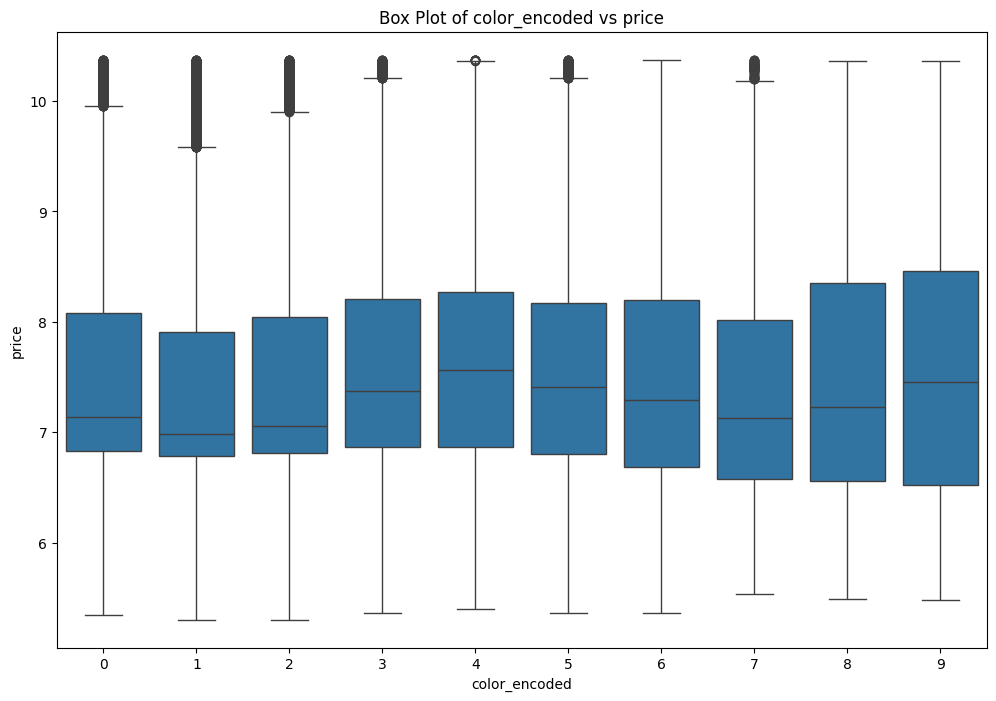

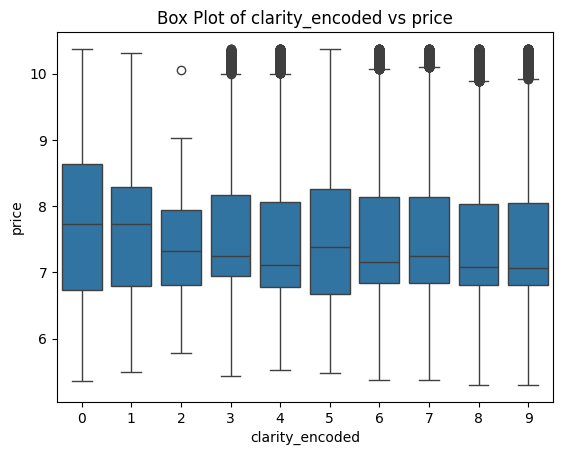

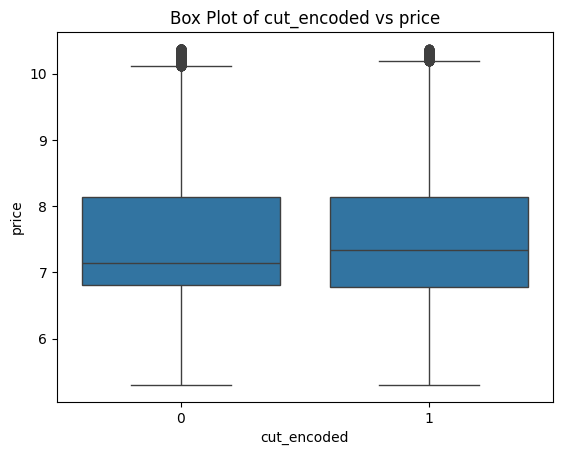

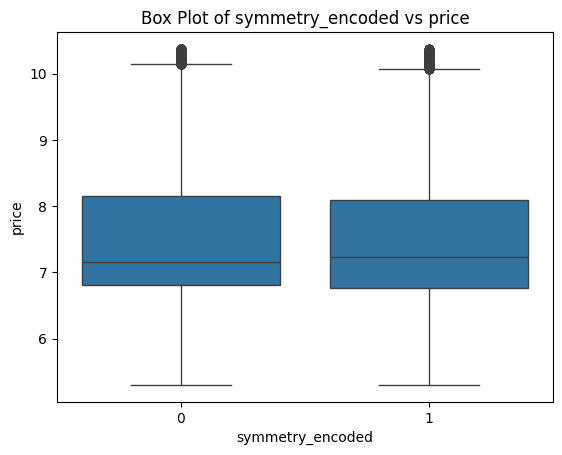

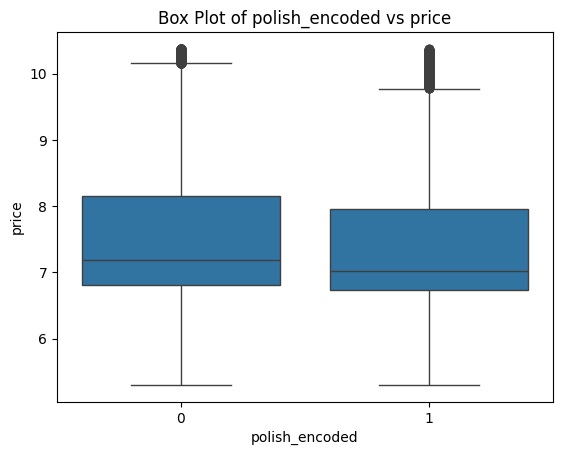

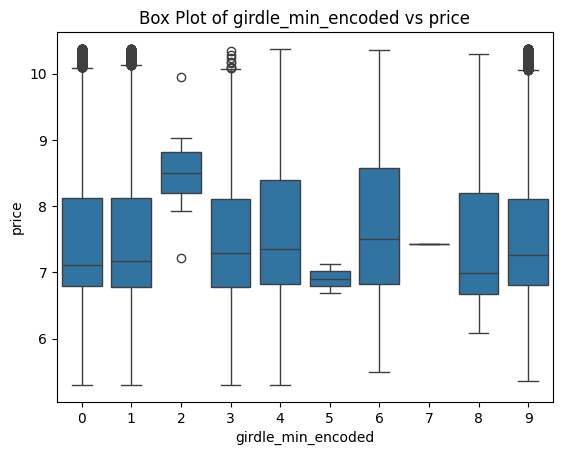

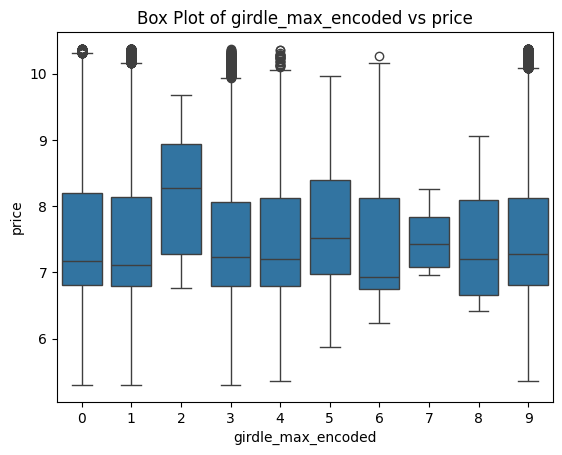

In [ ]:
categorical_columns = dataset_box.select_dtypes(include=['object']).columns
target_variable = 'price'
print(categorical_columns)

plt.figure(figsize=(12, 8))
for column in categorical_columns:
    sns.boxplot(x=column, y=target_variable, data=dataset)
    plt.title(f'Box Plot of {column} vs {target_variable}')
    plt.show()

## Question 1.4
For the Diamonds dataset, plot the counts by color, cut and clarity. or for the wine quality dataset, plot histogram for quality scores.

**Answer:**
Plots of counts by color. cut and clarity respectively

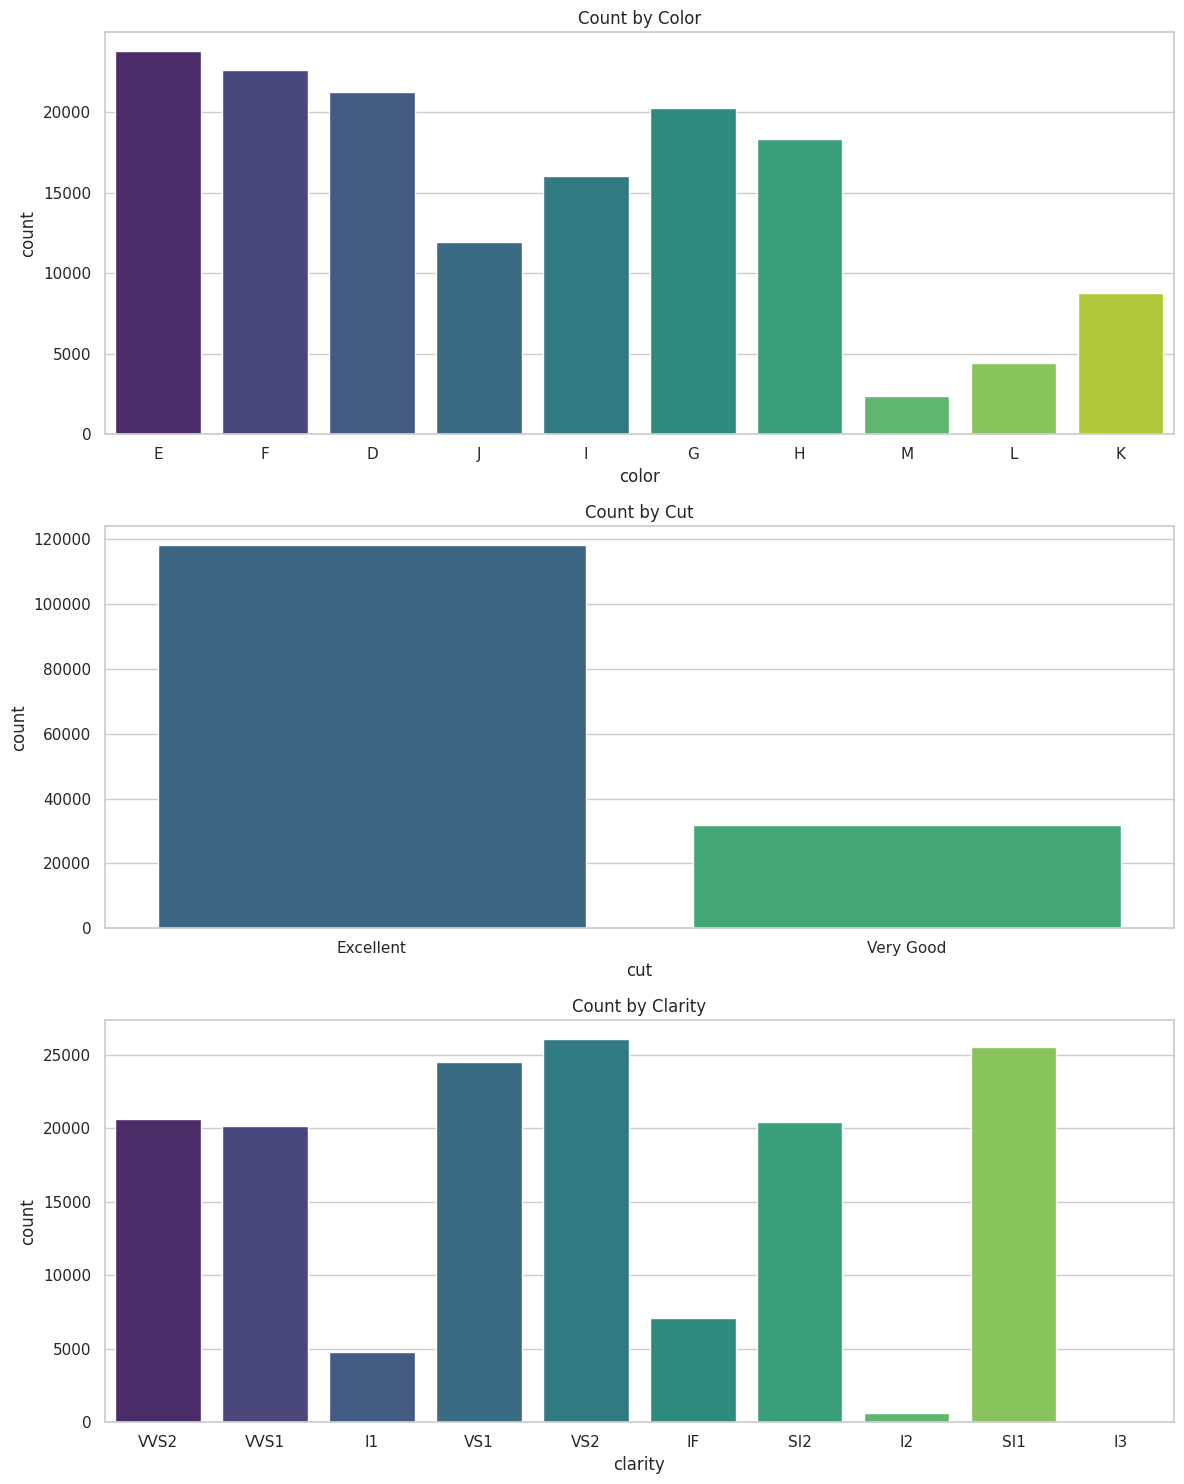

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

sns.countplot(x='color', data=dataset_org, ax=axes[0], hue='color', palette='viridis', legend=False)
axes[0].set_title('Count by Color')

sns.countplot(x='cut', data=dataset_org, ax=axes[1], hue='cut', palette='viridis', legend=False)
axes[1].set_title('Count by Cut')

sns.countplot(x='clarity', data=dataset_org, ax=axes[2], hue='clarity', palette='viridis', legend=False)
axes[2].set_title('Count by Clarity')

plt.tight_layout()
plt.show()


## Question 2.1
Standardization of datasets is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more-or-less look like standard normally distributed data: Gaussian with zero mean and unit variance. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
Standardize feature columns and prepare them for training.

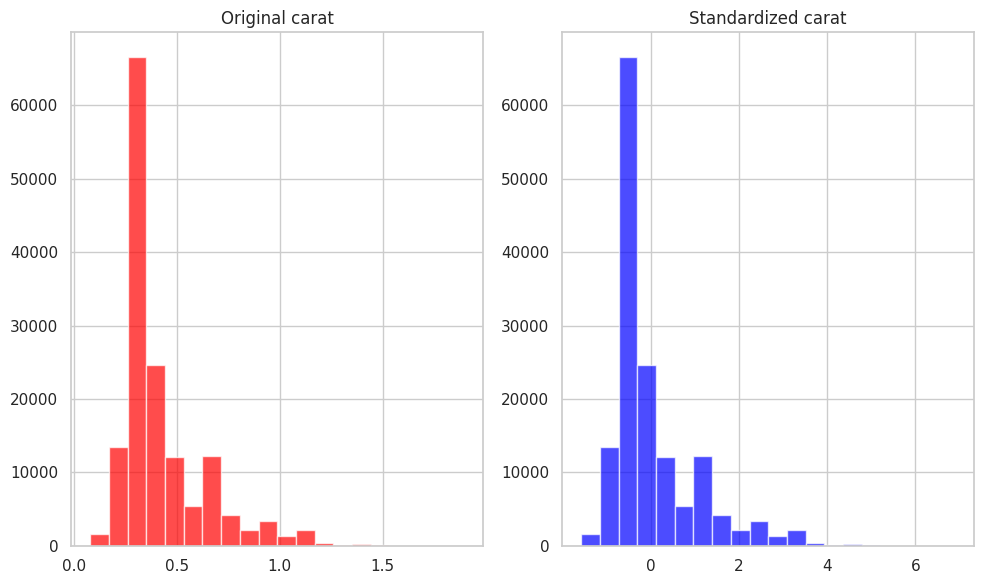

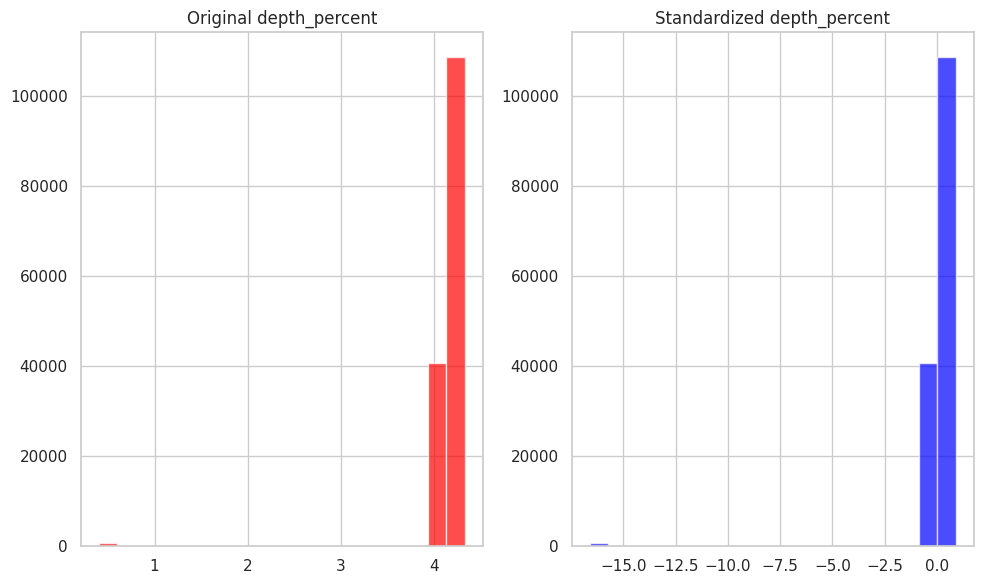

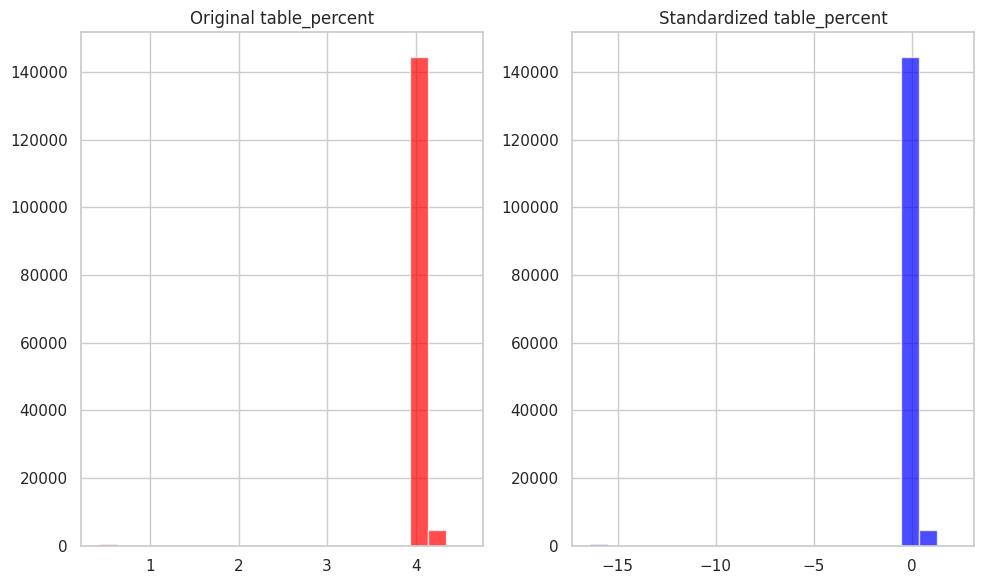

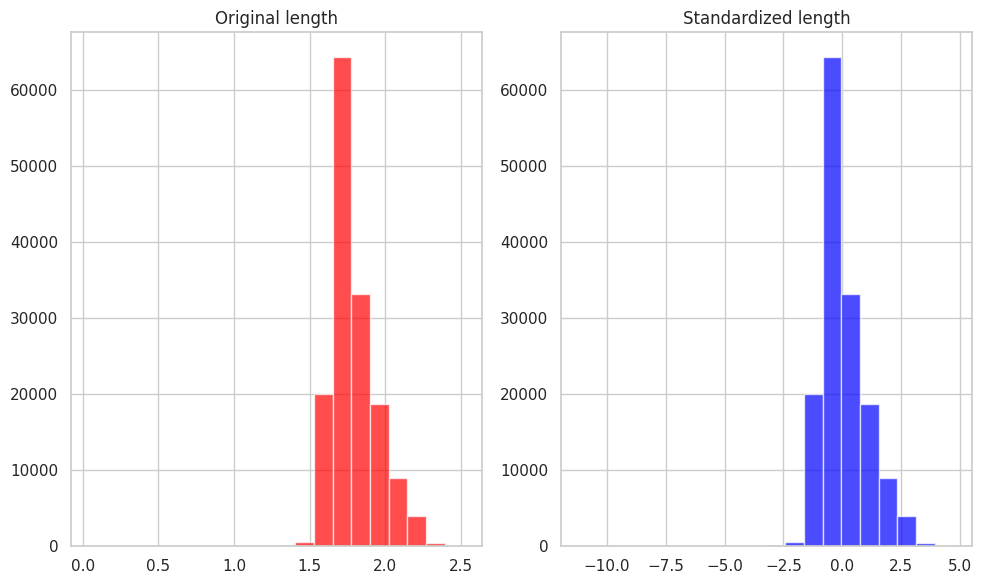

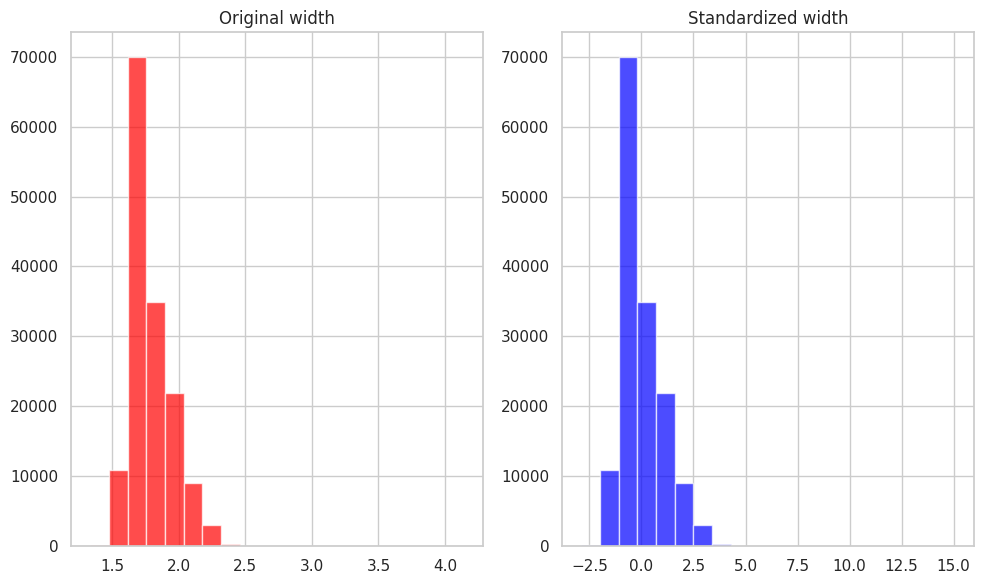

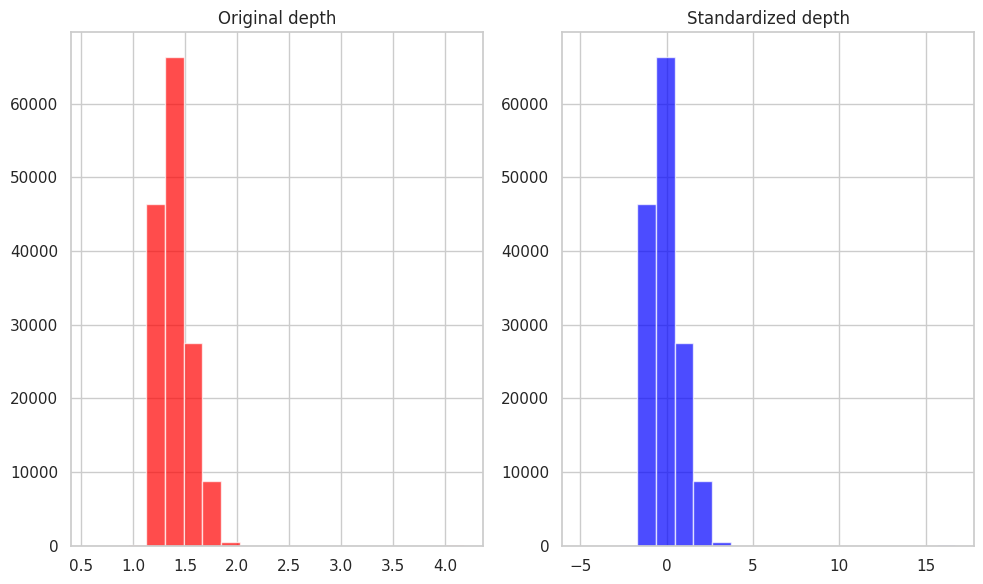

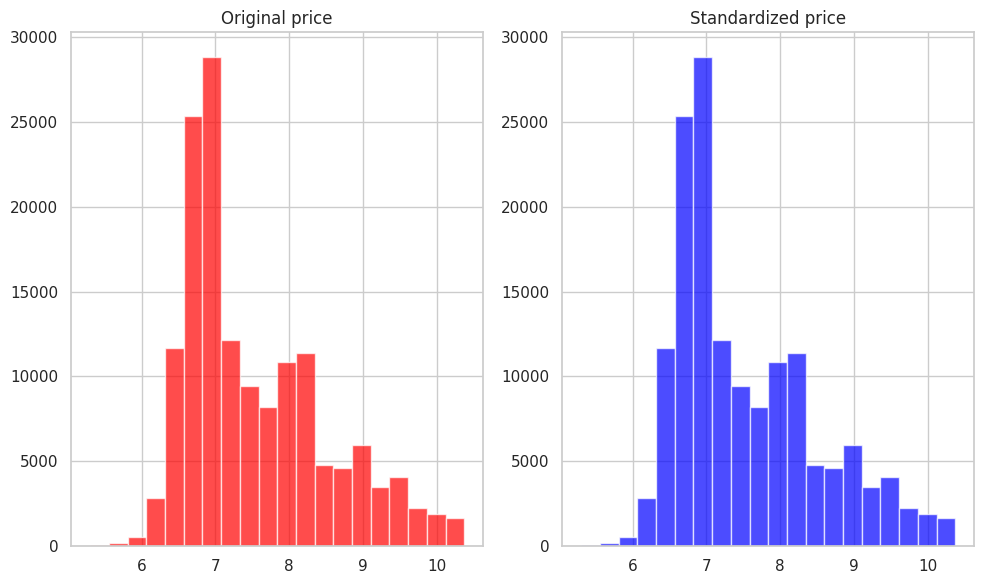

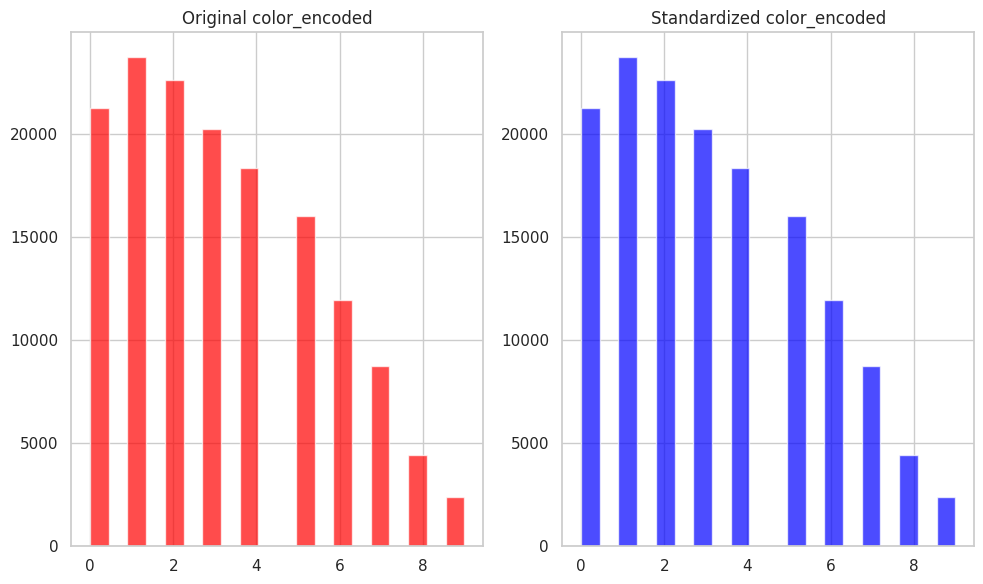

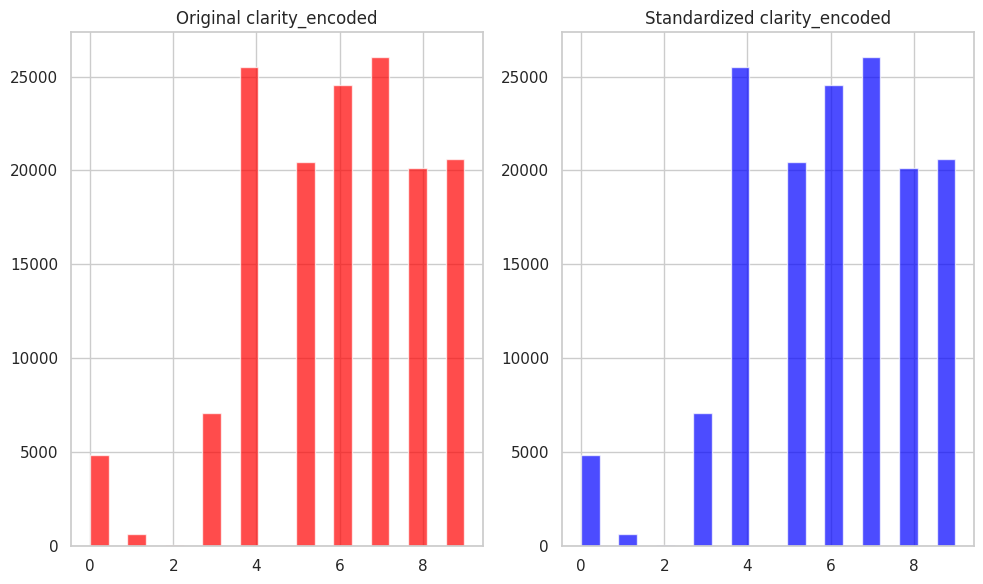

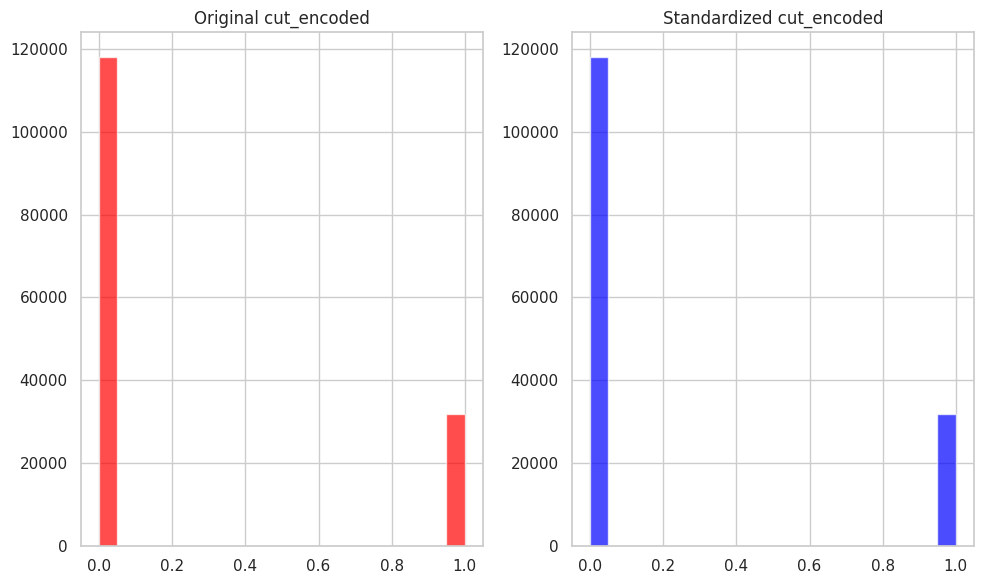

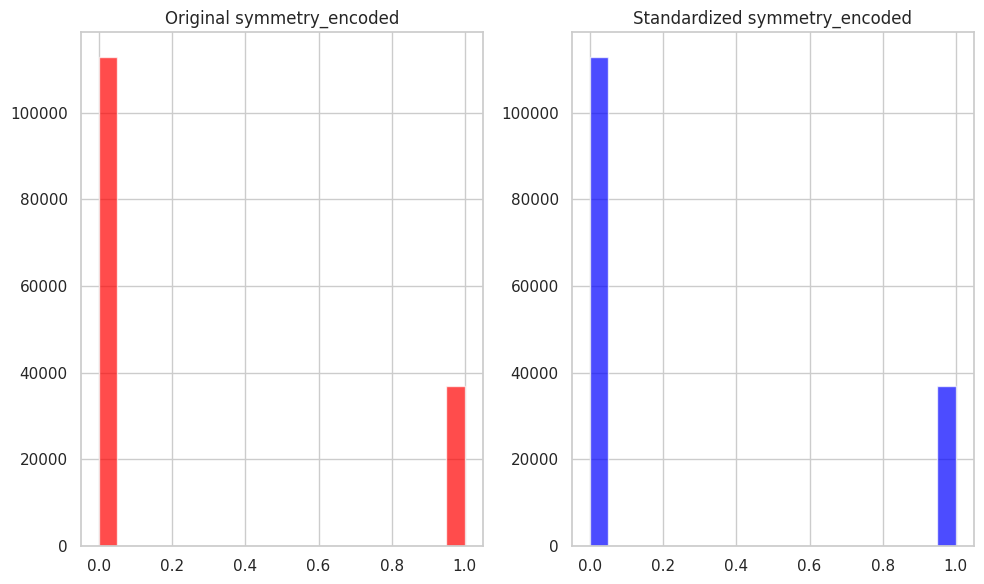

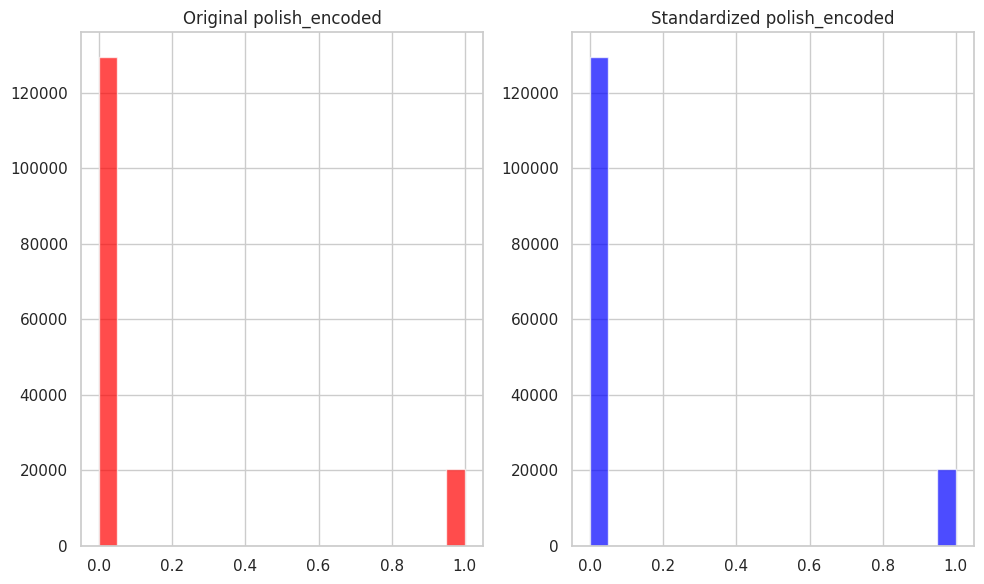

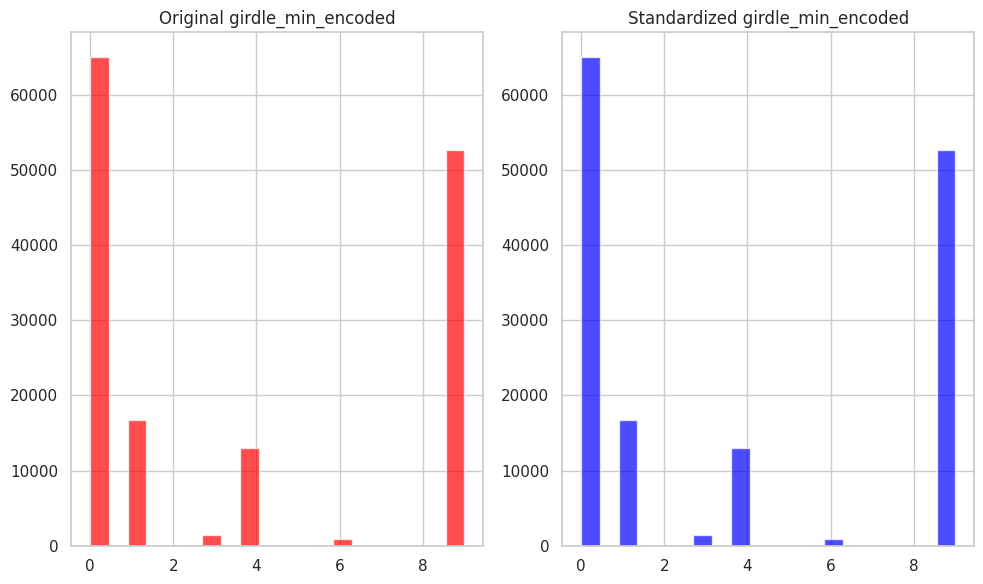

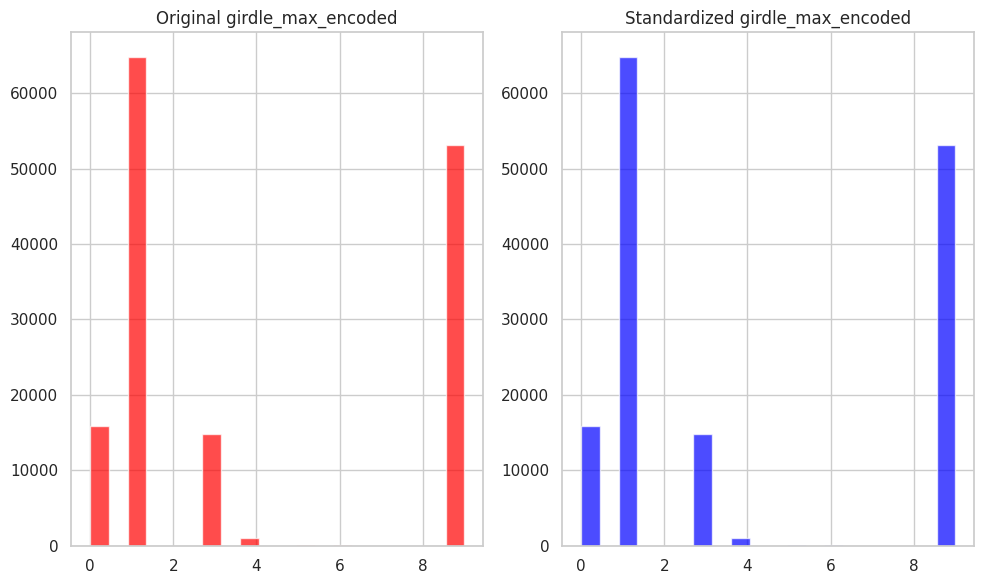

In [ ]:
word_columns = ['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth']
dataset_standardize = dataset.drop(columns=['Unnamed: 0'], errors='ignore')
dataset_standardize[word_columns] = dataset_standardize[word_columns].astype('object')
scaler = StandardScaler()
dataset_standardize[word_columns] = scaler.fit_transform(dataset_standardize[word_columns])

def plot_standardize(X_standardized, X, feature_to_plot):
  # Plot the result (considering just one feature for visualization purposes)
  plt.figure(figsize=(10, 6))

  # Plot original feature
  plt.subplot(1, 2, 1)
  plt.hist(X[feature_to_plot], bins=20, color='red', alpha=0.7)
  plt.title(f'Original {feature_to_plot}')

  # Plot standardized feature
  plt.subplot(1, 2, 2)
  plt.hist(X_standardized[feature_to_plot], bins=20, color='blue', alpha=0.7)
  plt.title(f'Standardized {feature_to_plot}')

  plt.tight_layout()
  plt.show()

for i in dataset_standardize.columns:
  plot_standardize(dataset_standardize, dataset, i)

By using the StandardScaler().we could get the dataset_standarlize

#### Question 2.2
1.sklearn.feature selection.mutual info regression function returns estimated mutual information between each feature and the label. Mutual information (MI) between two random variables is a non-negative value which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

2.sklearn.feature selection.f regression function provides F scores, which is a way of comparing the significance of the improvement of a model, with respect to the addition of new variables.

You **may** use these functions to select features that yield better regression results (especially in the classical models). Describe how this step qualitatively affects the performance of your models in terms of test RMSE. Is it true for all model types? Also list two features for either dataset that has the lowest MI w.r.t to the target.

In [ ]:
dataset_standardize[feature] = np.expm1(dataset_standardize[feature])
dataset_box[feature] = np.expm1(dataset_box[feature])
X_diamonds = dataset_standardize.drop(columns=['price'])
y_diamonds = dataset_standardize['price']
mi_scores_diamonds = mutual_info_regression(X_diamonds, y_diamonds)
print(mi_scores_diamonds)
f_scores_diamonds, _ = f_regression(X_diamonds, y_diamonds)
print(f_scores_diamonds)
lowest_mi_indices_diamonds = mi_scores_diamonds.argsort()[:2]
lowest_mi_features_diamonds = X_diamonds.columns[lowest_mi_indices_diamonds]
print("Two features with the lowest MI scores in diamonds dataset:", lowest_mi_features_diamonds)

[1.37308011 0.04146223 0.02549249 1.19306838 1.20418672 1.15954697
 0.18244622 0.17230685 0.02665304 0.02392005 0.00837249 0.0276085
 0.03805547]
[5.71264581e+05 1.24417879e+02 1.73691780e+02 3.46992057e+05
 3.42674918e+05 1.65898295e+05 3.34472819e+02 1.56927332e+02
 8.89580309e+01 3.33901556e+02 4.53535242e+02 5.74258104e-02
 2.96399792e+01]
Two features with the lowest MI scores in diamonds dataset: Index(['polish_encoded', 'symmetry_encoded'], dtype='object')


In [ ]:
top_features_indices = mi_scores_diamonds.argsort()[::-1][:6]
top_features_MI = X_diamonds.columns[top_features_indices]
print("6 features with the highest MI scores in diamonds dataset:\n", top_features_MI)

top_features_indices = f_scores_diamonds.argsort()[::-1][:6]
top_features_F_Scores = X_diamonds.columns[top_features_indices]
print("\n6 features with the highest F scores in diamonds dataset:\n", top_features_F_Scores)
top_features_MI.intersection(top_features_MI)

bottom_features_indices = mi_scores_diamonds.argsort()[:2]
bottom_features_MI = X_diamonds.columns[bottom_features_indices]
print("\n2 features with the lowest MI scores in diamonds dataset:\n", bottom_features_MI)

bottom_features_indices = f_scores_diamonds.argsort()[:2]
bottom_features_F_Scores = X_diamonds.columns[bottom_features_indices]
print("\n2 features with the lowest F scores in diamonds dataset:\n", bottom_features_F_Scores)


6 features with the highest MI scores in diamonds dataset:
 Index(['carat', 'width', 'length', 'depth', 'color_encoded',
       'clarity_encoded'],
      dtype='object')

6 features with the highest F scores in diamonds dataset:
 Index(['carat', 'length', 'width', 'depth', 'polish_encoded', 'color_encoded'], dtype='object')

2 features with the lowest MI scores in diamonds dataset:
 Index(['polish_encoded', 'symmetry_encoded'], dtype='object')

2 features with the lowest F scores in diamonds dataset:
 Index(['girdle_min_encoded', 'girdle_max_encoded'], dtype='object')


In [ ]:
bottom_features = bottom_features_F_Scores.union(bottom_features_MI)
top_features = top_features_MI.union(top_features_F_Scores)
top_features = top_features.difference(bottom_features)
top_features

Index(['carat', 'clarity_encoded', 'color_encoded', 'depth', 'length',
       'width'],
      dtype='object')

**Answer:**

### Effect of This Step  
This step significantly enhances model performance by eliminating irrelevant or redundant features. By doing so, the model can more effectively learn the relationship between the features and the target variable, ultimately improving its ability to generalize.  

### Applicability to Different Model Types  
For models like linear regression, feature selection plays a crucial role in improving performance. However, in deep learning models, which are capable of capturing complex feature interactions, feature selection may have a less significant impact.  

### Two Features with the Lowest Mutual Information (MI) to the Target  
- **polish_encoded**  
- **symmetry_encoded**


## Question 3 Evaluate following model:
Linear Regression \\
Polynomial Regression \\
Neural Network \\
Random Forest \\
Light-GBM

## Linear Regression
What is the objective function? Train three models: (a) ordinary least squares (linear regression without regularization), (b) Lasso and (c) Ridge regression, and answer the following questions.
**Answer:**

objective function:

OLS:

$$
\text{minimize } \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Lasso:

$$
\text{minimize } \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j|
$$

Ridge:

$$
\text{minimize } \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2
$$



In [ ]:
X_diamonds = dataset_standardize[top_features]
y_diamonds = dataset_standardize['price']
ols_model = LinearRegression()
lasso_model = Lasso(alpha=1.0)
ridge_model = Ridge(alpha=1.0)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
ols_train_rmse = []
ols_val_rmse = []
lasso_train_rmse = []
lasso_val_rmse = []
ridge_train_rmse = []
ridge_val_rmse = []
for train_index, val_index in kf.split(X_diamonds):
    X_train, X_val = X_diamonds.iloc[train_index], X_diamonds.iloc[val_index]
    y_train, y_val = y_diamonds.iloc[train_index], y_diamonds.iloc[val_index]
    # OLS
    ols_model.fit(X_train, y_train)
    ols_train_pred = ols_model.predict(X_train)
    ols_val_pred = ols_model.predict(X_val)
    ols_train_rmse.append(np.sqrt(mean_squared_error(y_train, ols_train_pred)))
    ols_val_rmse.append(np.sqrt(mean_squared_error(y_val, ols_val_pred)))

    # Lasso
    lasso_model.fit(X_train, y_train)
    lasso_train_pred = lasso_model.predict(X_train)
    lasso_val_pred = lasso_model.predict(X_val)
    lasso_train_rmse.append(np.sqrt(mean_squared_error(y_train, lasso_train_pred)))
    lasso_val_rmse.append(np.sqrt(mean_squared_error(y_val, lasso_val_pred)))

    # Ridge
    ridge_model.fit(X_train, y_train)
    ridge_train_pred = ridge_model.predict(X_train)
    ridge_val_pred = ridge_model.predict(X_val)
    ridge_train_rmse.append(np.sqrt(mean_squared_error(y_train, ridge_train_pred)))
    ridge_val_rmse.append(np.sqrt(mean_squared_error(y_val, ridge_val_pred)))

# RMSE
avg_ols_train_rmse = np.mean(ols_train_rmse)
avg_ols_val_rmse = np.mean(ols_val_rmse)
avg_lasso_train_rmse = np.mean(lasso_train_rmse)
avg_lasso_val_rmse = np.mean(lasso_val_rmse)
avg_ridge_train_rmse = np.mean(ridge_train_rmse)
avg_ridge_val_rmse = np.mean(ridge_val_rmse)

print("Average RMSE for OLS (Linear Regression) using top_features:")
print("Training set:", avg_ols_train_rmse)
print("Validation set:", avg_ols_val_rmse)

print("\nAverage RMSE for Lasso using top_features:")
print("Training set:", avg_lasso_train_rmse)
print("Validation set:", avg_lasso_val_rmse)

print("\nAverage RMSE for Ridge using top_features:")
print("Training set:", avg_ridge_train_rmse)
print("Validation set:", avg_ridge_val_rmse)


Average RMSE for OLS (Linear Regression) using top_features:
Training set: 1712.8308958897826
Validation set: 1720.8876025478016

Average RMSE for Lasso using top_features:
Training set: 1712.8623025893346
Validation set: 1720.6629258657624

Average RMSE for Ridge using top_features:
Training set: 1712.8309623025536
Validation set: 1720.8646266537678


## Question 4.1
Explain how each regularization scheme affects the learned parameter set

**Answer:**

**Lasso Regression**  
Lasso includes a regularization term that promotes sparsity in the weight vector, leading to some feature coefficients being reduced to exactly zero. This effectively removes less important features, allowing Lasso to perform feature selection while improving model simplicity.

**Ridge Regression**  
Ridge applies a regularization term that discourages large coefficients by shrinking them towards zero. However, unlike Lasso, it rarely reduces coefficients to exactly zero. Instead, it distributes the influence more evenly among correlated features, helping to address multicollinearity while maintaining all features in the model.


## Question 4.2
Report your choice of the best regularization scheme along with the optimal penalty parameter and explain how you computed it.

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso

# Assuming you have already:
# 1) standardized your features
# 2) defined X_diamonds and y_diamonds

param_grid = {'alpha': [1e-4, 1e-3, 0.01, 0.1, 1, 10, 100]}

#----------------------
# 1) Ridge Regression
#----------------------
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_diamonds, y_diamonds)
best_alpha_ridge = ridge_grid_search.best_params_['alpha']
print("Best Ridge alpha:", best_alpha_ridge)

best_ridge_model = Ridge(alpha=best_alpha_ridge)
# 10-fold cross-validation RMSE for Ridge
ridge_cv_scores = cross_val_score(best_ridge_model, X_diamonds, y_diamonds,
                                  cv=10, scoring='neg_mean_squared_error')
ridge_cv_rmse_scores = np.sqrt(-ridge_cv_scores)
ridge_avg_rmse = np.mean(ridge_cv_rmse_scores)
print("Ridge - Average RMSE from 10-fold CV:", ridge_avg_rmse)

#----------------------
# 2) Lasso Regression
#----------------------
lasso = Lasso(max_iter=10000)  # Increase max_iter to help convergence
lasso_grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_diamonds, y_diamonds)
best_alpha_lasso = lasso_grid_search.best_params_['alpha']
print("Best Lasso alpha:", best_alpha_lasso)

best_lasso_model = Lasso(alpha=best_alpha_lasso, max_iter=10000)
# 10-fold cross-validation RMSE for Lasso
lasso_cv_scores = cross_val_score(best_lasso_model, X_diamonds, y_diamonds,
                                  cv=10, scoring='neg_mean_squared_error')
lasso_cv_rmse_scores = np.sqrt(-lasso_cv_scores)
lasso_avg_rmse = np.mean(lasso_cv_rmse_scores)
print("Lasso - Average RMSE from 10-fold CV:", lasso_avg_rmse)

#-----------------------
# 3) Compare & Report
#-----------------------
if ridge_avg_rmse < lasso_avg_rmse:
    print(f"Ridge is better with RMSE = {ridge_avg_rmse:.4f}")
else:
    print(f"Lasso is better with RMSE = {lasso_avg_rmse:.4f}")


Best Ridge alpha: 0.0001
Ridge - Average RMSE from 10-fold CV: 1793.8471271620438
Best Lasso alpha: 0.0001
Lasso - Average RMSE from 10-fold CV: 1793.8476745979854
Ridge is better with RMSE = 1793.8471


**Answer:** We choose the ridge term and alpha is 0.0001

## Question 4.3
Does feature standardization play a role in improving the model performance (in the cases with ridge regularization)? Justify your answer.

In [ ]:
X_st = dataset_standardize.drop(columns=['price'])
y_st = dataset_standardize['price']
X_unst = dataset_box.drop(columns=['price'])
y_unst = dataset_box['price']
kf = KFold(n_splits=10, shuffle=True, random_state=42)
unst_train_rmse = []
unst_val_rmse = []
st_train_rmse = []
st_val_rmse = []
for train_index, val_index in kf.split(X_st):
    X_train, X_val = X_st.iloc[train_index], X_st.iloc[val_index]
    y_train, y_val = y_st.iloc[train_index], y_st.iloc[val_index]

    # Ridge
    ridge_model.fit(X_train, y_train)
    ridge_train_pred = ridge_model.predict(X_train)
    ridge_val_pred = ridge_model.predict(X_val)
    st_train_rmse.append(np.sqrt(mean_squared_error(y_train, ridge_train_pred)))
    st_val_rmse.append(np.sqrt(mean_squared_error(y_val, ridge_val_pred)))

for train_index, val_index in kf.split(X_unst):
    X_train, X_val = X_unst.iloc[train_index], X_unst.iloc[val_index]
    y_train, y_val = y_unst.iloc[train_index], y_unst.iloc[val_index]

    # Ridge
    ridge_model.fit(X_train, y_train)
    ridge_train_pred = ridge_model.predict(X_train)
    ridge_val_pred = ridge_model.predict(X_val)
    unst_train_rmse.append(np.sqrt(mean_squared_error(y_train, ridge_train_pred)))
    unst_val_rmse.append(np.sqrt(mean_squared_error(y_val, ridge_val_pred)))

# RMSE
avg_unst_train_rmse = np.mean(unst_train_rmse)
avg_unst_val_rmse = np.mean(unst_val_rmse)

print("\nAverage RMSE for Ridge using top_features unstandardized datas:")
print("Training set:", avg_unst_train_rmse)
print("Validation set:", avg_unst_val_rmse)

avg_st_train_rmse = np.mean(st_train_rmse)
avg_st_val_rmse = np.mean(st_val_rmse)

print("\nAverage RMSE for Ridge using top_features standardized datas:")
print("Training set:", avg_st_train_rmse)
print("Validation set:", avg_st_val_rmse)


Average RMSE for Ridge using top_features unstandardized datas:
Training set: 1670.0324856580232
Validation set: 1678.4984388531757

Average RMSE for Ridge using top_features standardized datas:
Training set: 1669.9739865189163
Validation set: 1679.288902084568


**Answer:** The feature standardization help to reduce errors a little bit.

## Question 4.4
Some linear regression packages return p-values for different features2. What is the meaning of these p-values and how can you infer the most significant features? A qualitative reasoning is sufficient.

**Answer**:

The p-value quantifies the likelihood of observing results as extreme or more extreme than what we have, assuming the null hypothesis is correct. When the p-value is small, it indicates stronger evidence against the null hypothesis, suggesting that the feature in question is more significant.

##  Polynomial Regression

Polynomial Ridge Regression RMSE on Training Set (Degree 2): 1100.3008085590777
Polynomial Ridge Regression RMSE on Test Set (Degree 2): 1113.808114767818


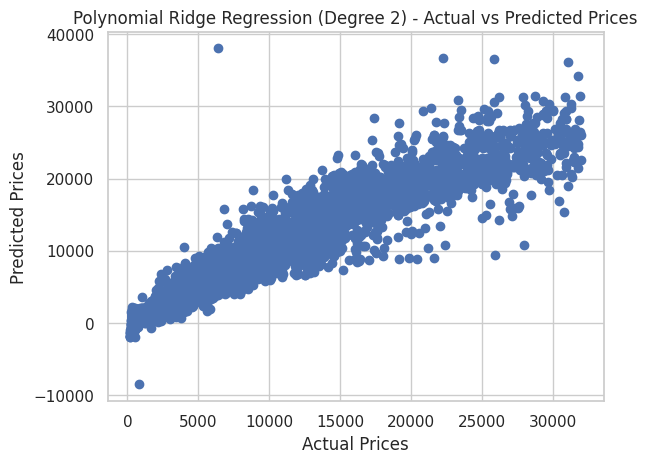

In [ ]:
X = dataset_standardize[top_features]
y = dataset_standardize['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=0.001)
degree = 2
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
ridge_model.fit(X_poly_train, y_train)
y_pred_train = ridge_model.predict(X_poly_train)
y_pred_test = ridge_model.predict(X_poly_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Polynomial Ridge Regression RMSE on Training Set (Degree {degree}): {rmse_train}")
print(f"Polynomial Ridge Regression RMSE on Test Set (Degree {degree}): {rmse_test}")
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Polynomial Ridge Regression (Degree {degree}) - Actual vs Predicted Prices')
plt.show()

## Question 5.1
What are the most salient features? Why? \\
**Answer:** We obtain the rank by calculating polynomial features' coefficients.

In [ ]:
coefficients = ridge_model.coef_
poly_features = poly.fit_transform(X_train)
original_feature_names = X_train.columns
poly_features_names = [f"{feature}^{degree}" for feature in original_feature_names for degree in range(1, poly.get_params()['degree'] + 1)]
feature_coefficients = dict(zip(poly_features_names, coefficients))
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, coef in sorted_features:
    print(f"{feature}: {coef}")

width^2: 2795.943166624949
depth^2: -1569.8048027324066
length^2: -1118.6921848486609
carat^2: 990.9222681669156
color_encoded^2: 639.2913176632065
color_encoded^1: 500.67216449361086
length^1: 479.07282966019557
clarity_encoded^1: 287.71190616361696
depth^1: 224.57237623692401
clarity_encoded^2: 86.57794003460873
width^1: -32.35715256748065
carat^1: 0.0


The Width has the most salient feature with highest polynomial features' coefficients

## Question 5.2
What degree of polynomial is best? How did you find the optimal degree? What does a very high-order polynomial imply about the fit on the training data? What about its performance on testing data?

In [ ]:
X = dataset_standardize[top_features]
y = dataset_standardize['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=0.001)
degrees = [1,2,3,4,5,6]
for degree in degrees:
  poly = PolynomialFeatures(degree)
  X_poly_train = poly.fit_transform(X_train)
  X_poly_test = poly.transform(X_test)
  ridge_model.fit(X_poly_train, y_train)
  y_pred_train = ridge_model.predict(X_poly_train)
  y_pred_test = ridge_model.predict(X_poly_test)
  rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
  rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
  print(f"Polynomial Ridge Regression RMSE on Training Set (Degree {degree}): {rmse_train}")
  print(f"Polynomial Ridge Regression RMSE on Test Set (Degree {degree}): {rmse_test}")

Polynomial Ridge Regression RMSE on Training Set (Degree 1): 1711.3297815185722
Polynomial Ridge Regression RMSE on Test Set (Degree 1): 1720.9294559183238
Polynomial Ridge Regression RMSE on Training Set (Degree 2): 1100.3008085590777
Polynomial Ridge Regression RMSE on Test Set (Degree 2): 1113.808114767818
Polynomial Ridge Regression RMSE on Training Set (Degree 3): 1013.9692177207717
Polynomial Ridge Regression RMSE on Test Set (Degree 3): 1585.4326901672594
Polynomial Ridge Regression RMSE on Training Set (Degree 4): 963.4763018850667
Polynomial Ridge Regression RMSE on Test Set (Degree 4): 169741.84620858368


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.96064e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Polynomial Ridge Regression RMSE on Training Set (Degree 5): 928.0483021414998
Polynomial Ridge Regression RMSE on Test Set (Degree 5): 5888022.225645388


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.09577e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Polynomial Ridge Regression RMSE on Training Set (Degree 6): 878.094449923953
Polynomial Ridge Regression RMSE on Test Set (Degree 6): 150622622.28645268


**Answer:**

Polynomial of degree 2 is the best. We find the optimal degree by trying degrees from 1 to 6 and calculate RMSE of training and testing.

High-order: High-order' s training data is fixed better and better as the order gets bigger. However, their test datas are fit worse and worse since degree 2.

Since there is overfitting of dataset.

## Neural Network

In [ ]:
X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLPRegressor set up
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Model training
mlp_model.fit(X_train_scaled, y_train)

# Prediction
y_train_pred = mlp_model.predict(X_train_scaled)
y_test_pred = mlp_model.predict(X_test_scaled)

# Evaluate
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 731.5860482479507
Testing RMSE: 751.085851856


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import warnings
warnings.filterwarnings('ignore')  # to ignore the warning of the mlp below

## Question 6.1
Adjust your network size (number of hidden neurons and depth), and weight decay as regularization. Find a good hyper-parameter set systematically (no more than 20 experiments in total).

In [ ]:
X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
param_grid = {
    'mlpregressor__hidden_layer_sizes': [(30,), (30, 30), (30, 50)],
    'mlpregressor__alpha': [0.001, 0.01]
}


pipeline = make_pipeline(
    StandardScaler(),
    MLPRegressor(max_iter=500, random_state=42)  # default solver='adam'
)

grid_search = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'mlpregressor__alpha': 0.01, 'mlpregressor__hidden_layer_sizes': (30, 50)}


## Question 6.2
How does the performance generally compare with linear regression? Why?

In [ ]:
X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLPRegressor set up
mlp_model = MLPRegressor(hidden_layer_sizes=(30, 50), activation='relu', alpha=0.01, max_iter=500, random_state=42)

# Model training
mlp_model.fit(X_train_scaled, y_train)

# Prediction
y_train_pred = mlp_model.predict(X_train_scaled)
y_test_pred = mlp_model.predict(X_test_scaled)

# Evaluate
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 924.2239857611568
Testing RMSE: 932.8348720252524


**Answer:**

**linear Ridge Regression:**

linear Ridge Regression RMSE on Training Set : 1712.8309623025536

linear Ridge Regression RMSE on Val Set : 1720.8646266537678

**Polynomial Ridge Regression:**

Polynomial Ridge Regression RMSE on Training Set (Degree 2): 1100.3008085590773

Polynomial Ridge Regression RMSE on Test Set (Degree 2): 1113.8081147680575

MLP(fully connected neural network) using the best hyperparameters:

Training RMSE: 924.2239857611568

Testing RMSE: 932.8348720252524

From the results, we can see that MLP is better. since the MLP has a better way to build mode and a general way to approximation the dataset

## Question 6.3
What activation function did you use for the output and why? You may use none.

**Answer:** Generally, we use the relu. ReLU often delivers better performance because, compared to activation functions like sigmoid or tanh, it avoids or significantly reduces the vanishing gradient problem for positive inputs.

## Question 6.4
What is the risk of increasing the depth of the network too far?

We may have overfitting for dataset, or Vanishing/Exploding Gradients

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_features=1.0, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 244.06316748627904
Testing RMSE: 637.6705898096985


## Question 7.1
Explain how these hyper-parameters affect the overall performance. Describe if and how each hyper-parameter results in a regularization effect during training.


Differences when changing maximum features.

In [ ]:
# max_features=5

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_features=5, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 249.9956695357172
Testing RMSE: 657.8056788197995


In [ ]:
# max_features=10

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_features=10, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 243.19461200858836
Testing RMSE: 637.3994508098805


In [ ]:
# max_features=20

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 244.06316748627904
Testing RMSE: 637.6705898096985


Differences when changing number of trees.

In [ ]:
# number of trees = 50

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=50, max_features=1.0, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 248.55057485921424
Testing RMSE: 641.254511507624


In [ ]:
# number of trees = 100

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_features=1.0, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 244.06316748627904
Testing RMSE: 637.6705898096985


In [ ]:
# number of trees = 150

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=150, max_features=1.0, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 242.5177258993799
Testing RMSE: 637.6552272119716


In [ ]:
# number of trees = 200

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=200, max_features=1.0, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 241.43614419722292
Testing RMSE: 636.0265907297251


Differences when changing depth of each tree.

In [ ]:
# depth of each tree = 5

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_features=1.0, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 1167.6451268418143
Testing RMSE: 1197.2234377757295


In [ ]:
# depth of each tree = 10

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_features=1.0, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 588.8265542627638
Testing RMSE: 664.1968205572799


In [ ]:
# depth of each tree = 15

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_features=1.0, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 346.9186918064538
Testing RMSE: 633.7490754493695


In [ ]:
# depth of each tree = 20

X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_features=1.0, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 260.1424715019477
Testing RMSE: 638.0814609870924


**Answer:** When you increase the number of trees, both training and validation RMSE tend to drop, so it’s advisable to use enough trees to achieve stable performance. Even if you keep adding more trees beyond that point, any improvement becomes minimal or nonexistent; importantly, this doesn’t lead to overfitting.

The maximum depth of each tree has a substantial impact. Allowing deeper trees reduces both training and validation RMSE; however, an overly large depth can cause the model to memorize noise, leading to overfitting.

Similarly, letting each tree consider more features generally enhances performance up to a point, but using too many features can harm the model’s accuracy. Consequently, choosing a balanced number of features is key.

Ultimately, the maximum tree depth and the number of features act as forms of regularization in a random forest. If they’re set too low, the model underfits; if they’re set too high, it risks overfitting.

## Question 7.2
How do random forests create a highly non-linear decision boundary despite the fact that all we do at each layer is apply a threshold on a feature?

**Answer:** Random Forests generate highly non-linear decision boundaries by training numerous decision trees on varying subsets of both the data and the features. First, through bootstrap aggregating (bagging), each tree is built on a random sample (with replacement) of the original dataset, meaning each tree encounters a slightly different version of the data. Second, at each split in every tree, only a random subset of features is considered, which encourages diversity in how different trees make decisions. Finally, the model’s overall prediction comes from combining the outputs of all individual trees—averaging for regression or majority voting for classification. By blending these factors, each tree contributes a unique perspective, enabling Random Forests to capture complex, non-linear relationships. This ensemble strategy also lessens the risk of overfitting, leading to stronger generalization performance.

## Question 7.3
Randomly pick a tree in your random forest model (with maximum depth of 4) and plot its structure. Which feature is selected for branching at the root node? What can you infer about the importance of this feature as opposed to others? Do the important features correspond to what you got in part 3.3.1?

**Answers:**

Carat is selected for branching at the root node.

We can infer that feature 'carat' is very important.

This happend to correspond to what I got in part 3.3.1.(Carat has the highest MI scores and F scores).

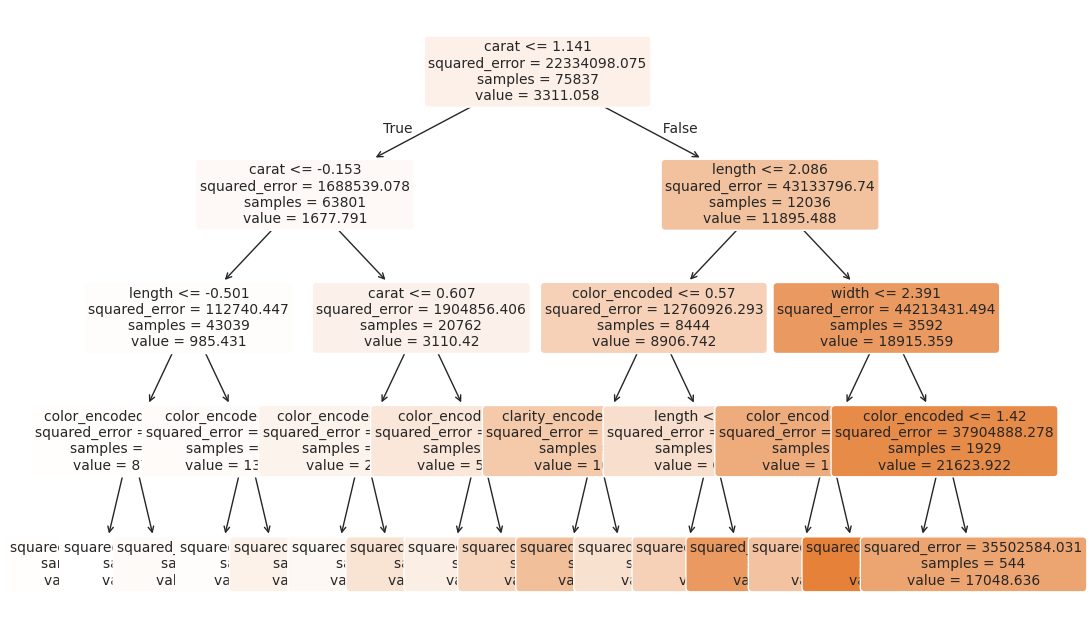

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, max_features=100, max_depth=4, random_state=42)
rf_model.fit(X_train_scaled, y_train)
selected_tree = rf_model.estimators_[0]
plt.figure(figsize=(12, 8))
plot_tree(selected_tree, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()

## Question 7.4
Measure “Out-of-Bag Error” (OOB). Explain what OOB error and R2 score means.

In [ ]:
X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_features=100, max_depth=4, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# calculate R2 score in training and testing dataset
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# calculate Out-of-Bag error
oob_error = 1 - rf_model.oob_score_

print("Out-of-Bag Error:", oob_error)
print("Training R2 Score:", train_r2)
print("Testing R2 Score:", test_r2)

Out-of-Bag Error: 0.09307222475993815
Training R2 Score: 0.908033860687085
Testing R2 Score: 0.9049246889250062


**Answers:**

The measured Out-of-Bag Error(OOB) is .

Explanation:

Out-of-Bag Error (OOB Error) and R² Score

**Out-of-Bag Error (OOB Error)** is the error evaluated on the samples that a particular decision tree in the random forest did not use during training. Specifically, for each tree, some data points are left out (OOB samples). The error is determined by using these OOB samples to predict with the corresponding tree, and then comparing those predictions against the actual values. The overall OOB error in a random forest is found by averaging the errors across all the individual trees.

**R² Score (R-squared)** is a metric that gauges how well a regression model explains the variance of the target variable. Its value ranges from 0 to 1, where a higher score (closer to 1) indicates that the model accounts for a larger portion of the target’s variance. Conversely, a lower R² score (close to 0) shows that the model explains very little of the variance in the data.


## Light-GBM

## Question 8.1
Read the documentation of LightGBM OR CatBoost and determine the important hyperparameters along with a search space for the tuning of these parameters (keep the search space small).

In [ ]:
label_encoder = LabelEncoder()
for column in ['color_encoded', 'clarity_encoded', 'cut_encoded', 'symmetry_encoded', 'polish_encoded', 'girdle_min_encoded', 'girdle_max_encoded']:
    dataset_box[column] = label_encoder.fit_transform(dataset_box[column])

In [ ]:
X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])
y_train_pred = bst.predict(X_train, num_iteration=bst.best_iteration)
y_test_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1247
[LightGBM] [Info] Number of data points in the train set: 119896, number of used features: 13
[LightGBM] [Info] Start training from score 3301.934935
Training RMSE: 623.1932326553059
Testing RMSE: 645.197468541811


In [ ]:
X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lgb_model = lgb.LGBMRegressor()
param_grid = {
    'num_leaves': [20, 50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 10],
    'min_child_samples': [10, 20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_lgb_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
y_train_pred = best_lgb_model.predict(X_train)
y_test_pred = best_lgb_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

**Answer:**

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 20, 'num_leaves': 50, 'subsample': 0.8}

Training RMSE: 534.5748891706002

Testing RMSE: 606.8423997626338

## Question 8.2
Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to find the ideal hyperparameter combination in your search space. Keep your search space small enough to finish running on a single Google Colab instance within 60 minutes. Report the best hyperparameter set found and the corresponding RMSE.

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['color_encoded', 'clarity_encoded', 'cut_encoded', 'symmetry_encoded', 'polish_encoded', 'girdle_min_encoded', 'girdle_max_encoded']:
    label_encoders[column] = LabelEncoder()
    dataset_box[column] = label_encoders[column].fit_transform(dataset_box[column])

In [ ]:
import numpy
import skopt
import lightgbm as lgb
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
X = dataset_box.drop(columns=['price'])
y = dataset_box['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values.astype(np.float64)
y_train = y_train.values.astype(np.float64)
X_test = X_test.values.astype(np.float64)
y_test = y_test.values.astype(np.float64)

lgb_model = lgb.LGBMRegressor()
param_space = {
    'num_leaves': (20, 100),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (5, 15),
    'min_child_samples': (10, 30),
    'subsample': (0.8, 1.0),
    'colsample_bytree': (0.8, 1.0)
}
bayes_search = BayesSearchCV(estimator=lgb_model, search_spaces=param_space, scoring='neg_mean_squared_error', cv=3, n_iter=20, random_state=42)
bayes_search.fit(X_train, y_train)
best_params = bayes_search.best_params_
best_lgb_model = bayes_search.best_estimator_
print("Best Parameters:", best_params)
y_train_pred = best_lgb_model.predict(X_train)
y_test_pred = best_lgb_model.predict(X_test)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 79930, number of used features: 13
[LightGBM] [Info] Start training from score 3299.794132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 79931, number of used features: 13
[LightGBM] [I

**Answers:**

Best Parameters:

colsample_bytree: 0.8967205724997757;

learning_rate: 0.12165670620526588;

max_depth: 15;

min_child_samples', 18;

um_leaves': 61;

subsample': 0.12165670620526588

Training RMSE: 498.5314587786603

Testing RMSE: 598.4692836293639

## Question 8.3
Qualitatively interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with regularization (shrinks the generalization gap)? Which affects the fitting efficiency?

**Answers:**

### Performance Improvements:
- **num_leaves**: Represents the number of leaves in the tree. Increasing this value enhances model complexity, leading to better fitting.
- **subsample**: Controls the ratio of data used per iteration. Lowering this value can help mitigate overfitting.
- **learning_rate**: Choosing an optimal learning rate improves accuracy and overall model performance.

### Regularization:
- **max_depth**: Defines the maximum depth of the tree. Reducing this parameter helps prevent overfitting and reduces the generalization gap.
- **min_child_samples**: Specifies the minimum number of samples required to create a leaf node. Increasing this value can prevent overfitting and improve the model's generalization ability.
- **colsample_bytree**: Determines the fraction of features used for each tree, reducing the dominance of specific features and enhancing generalization.

### Fitting Efficiency:
- **num_leaves**: A higher number of leaves increases model complexity, which in turn reduces fitting efficiency due to the larger number of parameters.
- **learning_rate**: Adjusting the learning rate affects efficiency—higher values speed up training but may lead to suboptimal convergence.
- **subsample**: Lowering the subsample ratio reduces the amount of training data utilized, consequently decreasing the computational load.


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!jupyter nbconvert "ECE219_project4.ipynb" --to PDF

[NbConvertApp] Converting notebook ECE219_project4.ipynb to PDF
[NbConvertApp] Support files will be in ECE219_project4_files/
[NbConvertApp] Making directory ./ECE219_project4_files
[NbConvertApp] Writing 713181 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1177176 bytes to ECE219_project4.pdf


### Question 9.1, Question 9.2

Stats for #gohawks
Average number of tweets per hour: 292.09326424870466
Average number of followers of users posting the tweets per tweet: 2217.9237355281984
Average number of retweets per tweet: 2.0132093991319877
-------------------------
Stats for #gopatriots
Average number of tweets per hour: 40.888695652173915
Average number of followers of users posting the tweets per tweet: 1427.2526051635405
Average number of retweets per tweet: 1.4081919101697078
-------------------------
Stats for #nfl
Average number of tweets per hour: 396.97103918228277
Average number of followers of users posting the tweets per tweet: 4662.37544523693
Average number of retweets per tweet: 1.5344602655543254


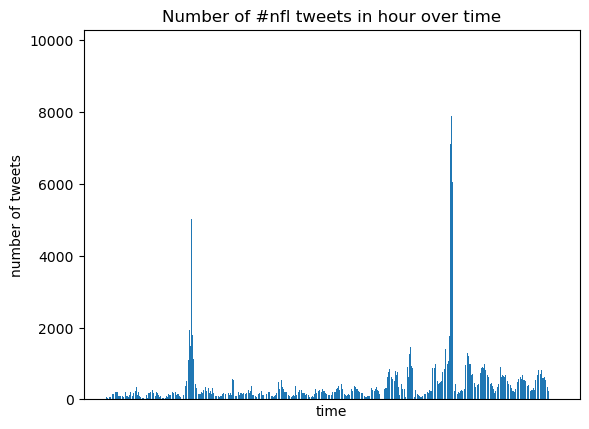

-------------------------
Stats for #patriots
Average number of tweets per hour: 750.6320272572402
Average number of followers of users posting the tweets per tweet: 3280.4635616550277
Average number of retweets per tweet: 1.7852871288476946
-------------------------
Stats for #sb49
Average number of tweets per hour: 1275.5557461406518
Average number of followers of users posting the tweets per tweet: 10374.160292019487
Average number of retweets per tweet: 2.52713444111402
-------------------------
Stats for #superbowl
Average number of tweets per hour: 2067.824531516184
Average number of followers of users posting the tweets per tweet: 8814.96799424623
Average number of retweets per tweet: 2.3911895819207736


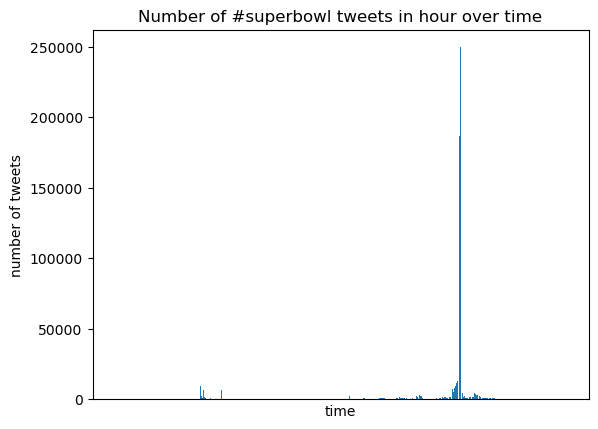

-------------------------


In [ ]:
import json
import math
import matplotlib.pyplot as plt

HASHTAGS = ['#gohawks', '#gopatriots', '#nfl', '#patriots', '#sb49', '#superbowl']
PLOT_HASHTAGS = {'#superbowl', '#nfl'}

# parse through every file
def parser(hashtag):
    plot = True if hashtag in PLOT_HASHTAGS else False

    tweet_count = 0
    followers = 0
    retweets = 0
    earliest_hour_key = math.inf
    latest_hour_key = 0
    if plot:
        tweets_per_hour = dict()

    with open(f'data/tweets_{hashtag}.txt', 'r') as f:
        for line in f:
            tweet_count += 1
            tweet = json.loads(line.strip())

            # accumulate tweets per hour
            hour_key = tweet['citation_date'] // 3600
            if hour_key < earliest_hour_key:
                earliest_hour_key = hour_key
            if hour_key > latest_hour_key:
                latest_hour_key = hour_key

            if plot:
                if hour_key not in tweets_per_hour:
                    tweets_per_hour[hour_key] = 1
                else:
                    tweets_per_hour[hour_key] += 1

            followers += int(tweet['author']['followers'])
            retweets += tweet['metrics']['citations']['total']

    # calculate average data
    num_hours = latest_hour_key - earliest_hour_key + 1
    average_tweets_per_hour = tweet_count / num_hours
    average_followers = followers / tweet_count
    average_retweets = retweets / tweet_count

    print(f'Stats for {hashtag}')
    print(f'Average number of tweets per hour: {average_tweets_per_hour}')
    print(f'Average number of followers of users posting the tweets per tweet: {average_followers}')
    print(f'Average number of retweets per tweet: {average_retweets}')

    if plot:
        x = list(range(earliest_hour_key, latest_hour_key+1))
        y = []
        for i in range(len(x)):
            y.append(tweets_per_hour.get(x[i], 0))
        plt.bar(x, y)
        plt.title(f'Number of {hashtag} tweets in hour over time')
        plt.xlabel('time')
        plt.xticks([])
        plt.ylabel('number of tweets')
        plt.show()

    print('-------------------------')

for hashtag in HASHTAGS:
    parser(hashtag)

### Question 10

##### Task
We believe that the way people talk on the Internet can give valuable information about the person. For instance, we feel that the location, time, and allegiance to a sports team can be predicted by the content and delivery of people through their Tweets. Thus, we have come up with the following tasks:

1. Given a tweet, predict
- which team they support
- when the tweet was posted (before / during / after the game)
- location of user

2. Generate a tweet for
- a Seahawk fan before the game
- a Seahawk fan after the game
- a Patriots fan before the game
- a Patriots fan after the game

As this is a natural langauge processing task, we used NLP lemmatization functions and dimensionality reduction methods similar to those in Project 1. The first task is a prediction task, so we will be using classification methods (binary and multi-class). The second task is a generation task so we relied on external models (GPT2) and fine-tuned the model to generate tweets in the same style as the training datasets. Detailed description will be done along the code blocks in later sections.

#### Data exploration
We first look at the dataset, and explore the different fields.

In [ ]:
import json

HASHTAGS = ['gohawks', 'gopatriots']

def extract_tweets(hashtag):
    team = 'hawks' if hashtag == 'gohawks' else 'patriots'
    tweets_data = []

    with open(f'data/tweets_#{hashtag}.txt', 'r') as f:
        for line in f:
            tweet = json.loads(line.strip())

            # remove tweets that contain both hawks and patriots hashtag
            hashtags = set()
            for h in tweet['tweet']['entities']['hashtags']:
                hashtags.add(h['text'])
            if 'gohawks' in hashtags and 'gopatriots' in hashtags:
                continue

            text = tweet['tweet']['text']
            location = tweet['tweet']['user']['location']
            time = tweet['citation_date']
            tweets_data.append(
                {'text': text,
                 'location': location,
                 'time': time,
                 'team': team}
            )

    return tweets_data

data = []
for hashtag in ['gopatriots']:
    data.extend(extract_tweets(hashtag))

In [ ]:
# check text
text_chars = set()
# check location
locations = set()

for obj in data:
    for char in obj['text']:
        text_chars.add(char)
    locations.add(obj['location'])

text_chars = sorted(list(text_chars))
print(f'Characters: \n{text_chars}')
print(f'Locations: \n{locations}')

Characters: 
['\n', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x80', '\x81', '\x82', '\x83', '\x84', '\x86', '\x87', '\x88', '\x89', '\x8a', '\x8b', '\x8c', '\x8d', '\x8e', '\x8f', '\x90', '\x91', '\x92', '\x93', '\x94', '\x95', '\x96', '\x97', '\x98', '\x99', '\x9a', '\x9b', '\x9c', '\x9d', '\x9f', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', 'º', '»', '¼', '¾', '¿', 'Á', 'Â', 'Ã', 'Ä', 'Å', 'Æ', 'Ç', 'É', 'Ê', 'Í', 'Ð', 'Ñ', 'Ó', 'Ô', 'Õ', 'Ù', 'Ú', 'Ü', 'Þ', 'ß', 'à', 'á', 'â

From the list of characters and locations here, we can see that textual information is very varied and messy. For instance, the locations are not stored in proper formatting, with some locations being invalid (like empty strings or 'former capital'). Thus, location grouping and filtering of invalid location are required. To ensure tweets are as succinct as possible and mimic natural sentences, tweets are also passed through a formatting function.

#### Feature engineering

Many of the tweet features are continuous and not particularly useful to learn valuable information from the dataset. For instance, the time that the tweet was sent is a continuous value but does not serve any purpose. Thus, we categorized time based on whether it was before, during, or after the game, so that we can assign specific categories to the data and use them for targetted training. This was done in the 'get_time_period' function. We did consider other methods such as breaking into smaller buckets (based on how close to the game the tweet was sent), but we did not find it particularly useful in terms of sentiment analysis, so only 3 buckets were used for this feature.

Location of user was another problematic feature, because apart from missing / weird location data in quite a large sample of the dataset, the granularity of the location could dramatically affect model performance. Originally, we believed that most of the tweets would be from the US (since it is a US-based sporting event) so we wanted to limit specifically to the US and do grouping based on US states. However, after doing a count on the spread of countries within the dataset, we realized there was a non-negligible number of tweets from other nations. Also, due to the lack of a normalized formatting of the location, it was extremely difficult to parse the location to find the exact state that a user was from (a lot of location data do not follow the "{City}, {State}" format). Thus, we decided to implement a granularity of country and use an external library "country-named-entity-recognition" to decipher the country name from the location data.

In [ ]:
import json
import re

HASHTAGS = ['gohawks', 'gopatriots']

def clean_text(text):
    # 1. combine continuous whitespace to just one whitespace
    # 2. remove hyperlinks or references (starts with @)
    # 3. remove any hashtags
    # 4. substitute special characters
    words = []
    for word in text.strip().split():
        if not word.startswith('http') and not word.startswith('@') and not word.startswith('#'):
            word = re.sub('&lt;', '<', word)
            word = re.sub('&gt;', '>', word)
            word = re.sub('&amp;', '&', word)
            words.append(word)
    return ' '.join(words)

def get_time_period(time):
    # determine whether time is before, during, or after the game
    # game started on 6:30pm EST according to Wikipedia (https://en.wikipedia.org/wiki/Super_Bowl_XLIX)
    # game lasted 3 hr 36 min according to Yahoo Sports (https://ca.sports.yahoo.com/news/long-super-bowl-heres-average-113020689.html?)
    start_time = 1422829800
    end_time = start_time + (3 * 60 + 36) * 60
    if time < start_time:
        return 'before'
    if time >= end_time:
        return 'after'
    return 'during'


def extract_tweets(hashtag):
    team = 'hawks' if hashtag == 'gohawks' else 'patriots'
    tweets_data = []

    with open(f'data/tweets_#{hashtag}.txt', 'r') as f:
        for line in f:
            tweet = json.loads(line.strip())

            # remove tweets that contain both hawks and patriots hashtag
            hashtags = set()
            for h in tweet['tweet']['entities']['hashtags']:
                hashtags.add(h['text'])
            if 'gohawks' in hashtags and 'gopatriots' in hashtags:
                continue

            text = clean_text(tweet['tweet']['text'])
            location = tweet['tweet']['user']['location']
            time = get_time_period(tweet['citation_date'])

            tweets_data.append(
                {'text': text,
                 'location': location,
                 'time': time,
                 'team': team}
            )

    return tweets_data

data = []
for hashtag in HASHTAGS:
    data.extend(extract_tweets(hashtag))

# save data to a text file so it can be easily moved to Google Colab
with open('data.txt', 'w') as f:
    for d in data:
        json.dump(d, f)
        f.write('\n')

In [ ]:
import json

# read from text file
try:
    with open('data.txt', 'r') as f:
        data = []
        for line in f:
            data.append(json.loads(line.strip()))
        print(len(data))
except:
    print('could not find data.txt file')

192613


#### Data Visualization
We generate word clouds for all tweets.

(-0.5, 999.5, 499.5, -0.5)

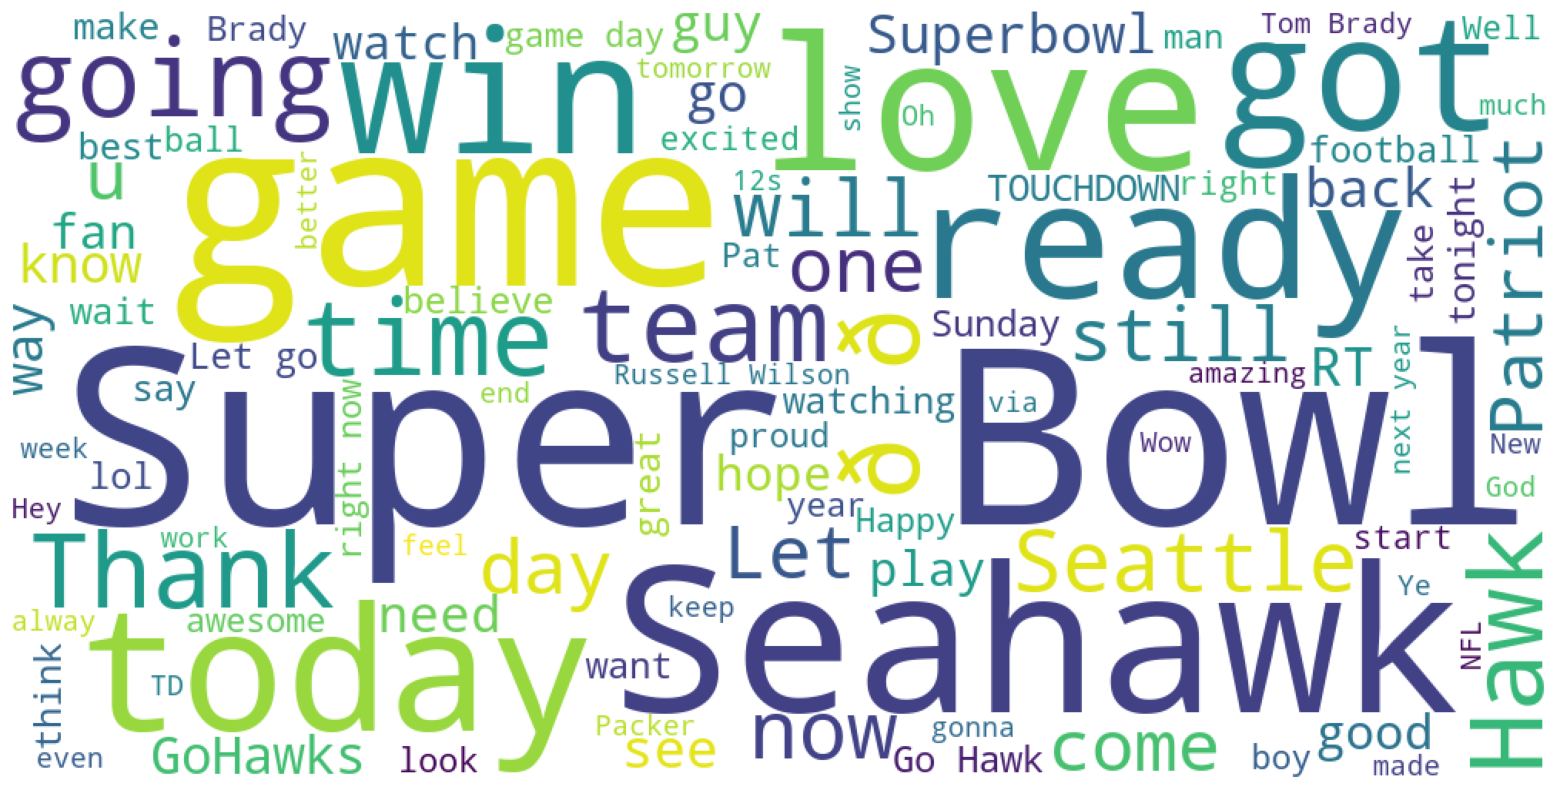

In [ ]:
# Generate wordcloud
# from: https://medium.com/@bijil.subhash/generating-tweets-using-gpt-2-d93e1a87105a
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = " ".join(d['text'] for d in data)
wordcloud = WordCloud(width = 1000, height = 500, max_words=100, background_color="white").generate(text)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")

#### 10.1.1 Predict team supported based on tweet

In [ ]:
# team prediction

team_count = {'hawks': 0, 'patriots': 0}
for d in data:
    team_count[d['team']] += 1

print(team_count)

{'hawks': 169112, 'patriots': 23501}


To reduce imbalance in data, we undersample the 'hawks' dataset to match the size of the 'patriots' dataset.

In [ ]:
import random

team_data = []
hawks = []
for d in data:
    if d['team'] == 'patriots':
        team_data.append(d)
    else:
        hawks.append(d)
random.shuffle(hawks)
team_data.extend(hawks[:23501])
random.shuffle(team_data)

new_team_count = {'hawks': 0, 'patriots': 0}
for d in team_data:
    new_team_count[d['team']] += 1

print(new_team_count)

{'hawks': 23501, 'patriots': 23501}


In [ ]:
# from project 1
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# from project 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk import pos_tag, wordnet
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, recall_score, roc_curve, precision_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from string import punctuation

In [ ]:
# lemmatizer
wnl = wordnet.WordNetLemmatizer()

# from helper_code
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

# from helper_code
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(list_word)]

analyzer = CountVectorizer().build_analyzer()

# get custom stop words, for filtering after lemmatization
# from helper_code
stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en), set(punctuation), set(stop_words_skt))

# exclude word that are all numbers
def is_all_numbers(word):
    for char in word:
        # if character is not a number / negative sign / decimal point
        if not char.isdigit() and char != '-' and char != '.':
            return False
    return True

# from helper_code
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not is_all_numbers(word))


def plot_roc(fpr, tpr, pipe_title):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    subplot_title = f'ROC curve for {pipe_title}'
    ax.title.set_text(subplot_title)
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def binaryclass_fit_predict_and_show_stats(pipe, train_data, train_label, test_data, test_label, binaryclass_labels, pipe_title):
    change_to_num = np.vectorize(lambda x: 0 if x==binaryclass_labels[0] else 1)
    new_train_label = change_to_num(train_label)
    new_test_label = change_to_num(test_label)

    pipe.fit(train_data, new_train_label)
    predicted = pipe.predict(test_data)
    cm = confusion_matrix(new_test_label, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)

    prob_score = pipe.predict_proba(test_data)
    fpr, tpr, _ = roc_curve(new_test_label, prob_score[:,1])

    # Plot ROC
    plot_roc(fpr, tpr, pipe_title)

    # Report stats
    print('----------')
    print(f"Stats for {pipe_title}")
    print(f"Accuracy score: {accuracy_score(new_test_label, predicted)}")
    print(f"Recall score: {recall_score(new_test_label, predicted)}")
    print(f"Precision score: {precision_score(new_test_label, predicted)}")
    print(f"F1 score: {f1_score(new_test_label, predicted)}")
    cm_display.plot()
    plt.show()
    print('----------')
    print()

def multiclass_fit_predict_and_show_stats(pipe, train_data, train_label, test_data, test_label, multiclass_labels, pipe_title):
    pipe.fit(train_data, train_label)
    predicted = pipe.predict(test_data)
    cm = confusion_matrix(test_label, predicted, labels=multiclass_labels)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=multiclass_labels)

    # Report stats
    print('----------')
    print(f"Stats for {pipe_title}")
    print(f"Accuracy score: {accuracy_score(test_label, predicted)}")
    print(f"Recall score: {recall_score(test_label, predicted, average='micro')}")
    print(f"Precision score: {precision_score(test_label, predicted, average='micro')}")
    print(f"F1 score: {f1_score(test_label, predicted, average='micro')}")
    cm_display.plot()
    plt.show()
    print('----------')
    print()

Here we decided to use GaussianNB as a baseline. We expect Gaussian models to perform worse because they are better for handling data that follow Gaussian distributions, which are usually not the case for NLP tasks like this one. However, it is a good baseline model as based on empirical findings, GaussianNB models train much faster than the other models. We built a LogisticRegression model to compare against the baseline, and we expect the LogisticRegression model to perform better in terms of accuracy and other metrics.

75202 18802


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Ready to train model
----------
Stats for GaussianNB
Accuracy score: 0.615360068077864
Recall score: 0.76111228144091
Precision score: 0.5927809680065628
F1 score: 0.6664821988562996


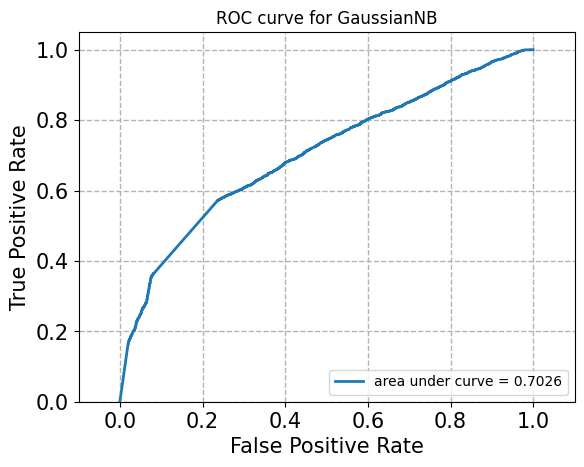

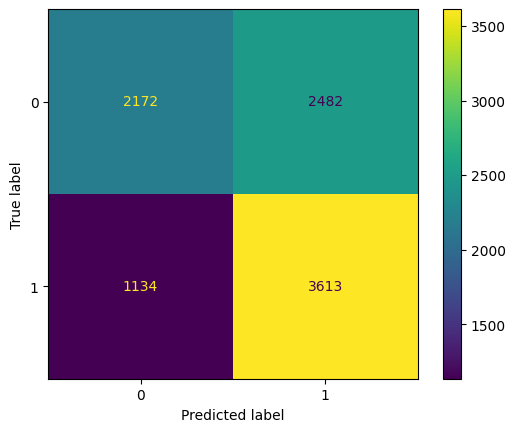

----------

----------
Stats for LogisticRegression
Accuracy score: 0.6839697904478247
Recall score: 0.7349905203286287
Precision score: 0.6707035755478662
F1 score: 0.7013770228163635


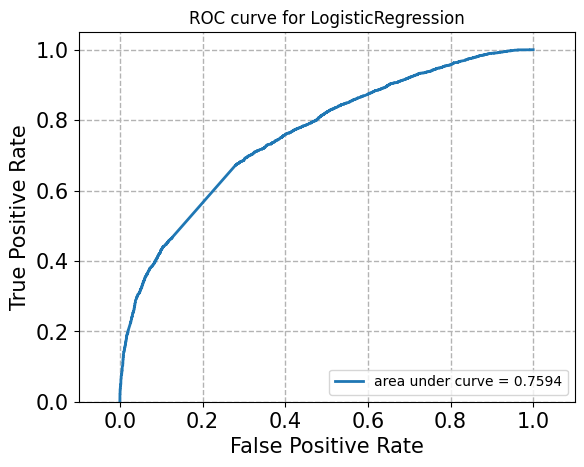

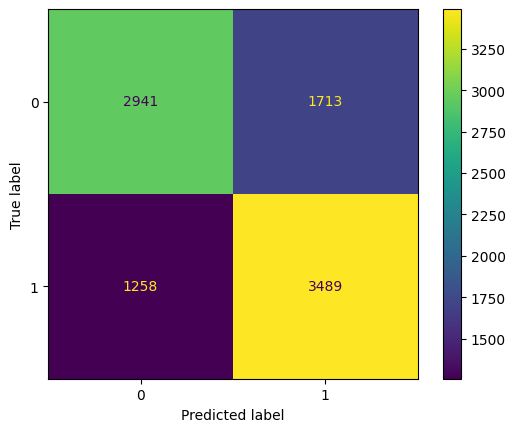

----------



In [ ]:
# 1.1 train model to predict team supported
df = pd.DataFrame.from_records(team_data)
binaryclass_train, binaryclass_test = train_test_split(df[['text', 'team']], test_size=0.2)
print(binaryclass_train.size, binaryclass_test.size)

vectorizer = CountVectorizer(analyzer=stem_rmv_punc,
                             stop_words='english',
                             min_df=3)
binaryclass_train_lemmatized = vectorizer.fit_transform(binaryclass_train['text'])
binaryclass_test_lemmatized = vectorizer.transform(binaryclass_test['text'])

tfidf_transformer = TfidfTransformer()
binaryclass_train_tfidf = tfidf_transformer.fit_transform(binaryclass_train_lemmatized)
binaryclass_test_tfidf = tfidf_transformer.transform(binaryclass_test_lemmatized)


svd = TruncatedSVD(n_components=100, random_state=42)
binaryclass_train_lsi = svd.fit_transform(binaryclass_train_tfidf)
binaryclass_test_lsi = svd.transform(binaryclass_test_tfidf)

pipelines = [
    ('GaussianNB', Pipeline([('clf', GaussianNB())])),
    ('LogisticRegression', Pipeline([('clf', LogisticRegression(penalty='l1', C=1/0.01, solver='liblinear'))]))
]

print('Ready to train model')

LABELS = ['hawks', 'patriots']
for title, pipeline in pipelines:
    binaryclass_fit_predict_and_show_stats(pipeline,
                                        binaryclass_train_lsi,
                                        binaryclass_train['team'],
                                        binaryclass_test_lsi,
                                        binaryclass_test['team'],
                                        LABELS,
                                        title)

As expected, the LogisticRegression model performs better than the baseline GaussianNB model across accuracy and all metrics. Detailed evaluation will be done later on at the end of all 3 prediction tasks.

#### 10.1.2 Predict time period of posting based on tweet

In [ ]:
# time period prediction

time_period_count = {'before': 0, 'during': 0, 'after': 0}
for d in data:
    time_period_count[d['time']] += 1

print(time_period_count)

{'before': 129815, 'during': 40918, 'after': 21880}


There are a lot fewer tweets from after the game, as compared to tweets before and during the game. To reduce imbalance in data, we undersample the 'before' and 'during' dataset to match the size of the 'after' dataset.

In [ ]:
import random

time_data = []
time_data_dict = {'before': [], 'during': [], 'after': []}
for d in data:
    time_data_dict[d['time']].append(d)
time_data.extend(time_data_dict['after'])

random.shuffle(time_data_dict['before'])
time_data.extend(time_data_dict['before'][:21880])
random.shuffle(time_data_dict['during'])
time_data.extend(time_data_dict['during'][:21880])

random.shuffle(time_data)

new_time_count = {'before': 0, 'during': 0, 'after': 0}
for d in time_data:
    new_time_count[d['time']] += 1

print(new_time_count)

{'before': 21880, 'during': 21880, 'after': 21880}


105024 26256


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Ready to train model
----------
Stats for GaussianNB
Accuracy score: 0.41803778184034124
Recall score: 0.41803778184034124
Precision score: 0.41803778184034124
F1 score: 0.41803778184034124


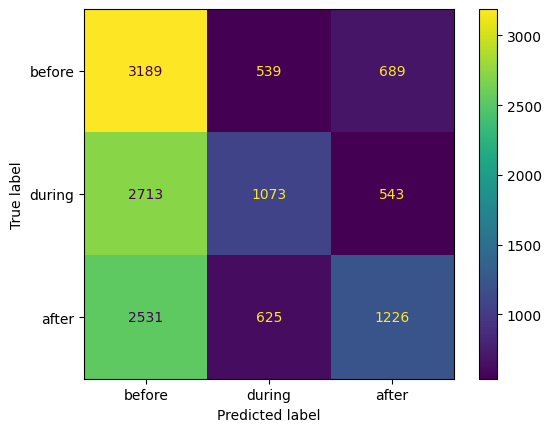

----------



In [ ]:
# 1.2 train model to predict time period
df = pd.DataFrame.from_records(time_data)
multiclass_train, multiclass_test = train_test_split(df[['text', 'time']], test_size=0.2)
print(multiclass_train.size, multiclass_test.size)

vectorizer = CountVectorizer(analyzer=stem_rmv_punc,
                             stop_words='english',
                             min_df=3)
multiclass_train_lemmatized = vectorizer.fit_transform(multiclass_train['text'])
multiclass_test_lemmatized = vectorizer.transform(multiclass_test['text'])

tfidf_transformer = TfidfTransformer()
multiclass_train_tfidf = tfidf_transformer.fit_transform(multiclass_train_lemmatized)
multiclass_test_tfidf = tfidf_transformer.transform(multiclass_test_lemmatized)


svd = TruncatedSVD(n_components=50, random_state=42)
multiclass_train_lsi = svd.fit_transform(multiclass_train_tfidf)
multiclass_test_lsi = svd.transform(multiclass_test_tfidf)

pipelines = [
    ('GaussianNB', Pipeline([('clf', GaussianNB())]))
]

print('Ready to train model')

TIME_LABELS = ['before', 'during', 'after']
for title, pipeline in pipelines:
    multiclass_fit_predict_and_show_stats(pipeline,
                                        multiclass_train_lsi,
                                        multiclass_train['time'],
                                        multiclass_test_lsi,
                                        multiclass_test['time'],
                                        TIME_LABELS,
                                        title)

#### 10.1.3 Predict user location based on tweet

The "country-named-entity-recognition" tool is used to do natural langauge processing on the location

From: https://github.com/fastdatascience/country_named_entity_recognition

In [ ]:
# if necessary
#!pip install country-named-entity-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595769 sha256=e2692343ab5a6cd242dda256948fd011e8b037238a329d545db0c03ff9299f71
  Stored in directory: /root/.cache/pip/wheels/72/d0/d2/87ac5f899a46bb9bd93d962289ae9c47ee975ffc10f7a25ae3
Successfully built pycountry


In [ ]:
# location filtering
from country_named_entity_recognition import find_countries

def filter_location(data):
    filtered = []
    for obj in data:
        loc = obj['location'].strip()
        if not loc:
            continue
        countries = find_countries(loc, is_ignore_case=True)
        if len(countries) == 0:
            continue
        new_loc = countries[0][0].name
        new_obj = obj.copy()
        new_obj['location'] = new_loc
        filtered.append(new_obj)

    return filtered

loc_filtered_data = filter_location(data)
print(f'Original dataset length: {len(data)}\nFiltered location dataset length: {len(loc_filtered_data)}')

# check imbalance in location dataset
loc_filtered_data_dict = dict()
for obj in loc_filtered_data:
    if obj['location'] not in loc_filtered_data_dict:
        loc_filtered_data_dict[obj['location']] = 1
    else:
        loc_filtered_data_dict[obj['location']] += 1
ordered = sorted(list(loc_filtered_data_dict.items()), key=lambda x: x[1], reverse=True)
print(ordered)

Original dataset length: 192613
Filtered location dataset length: 12338
[('United States', 4617), ('Canada', 1533), ('United Kingdom', 945), ('Mexico', 767), ('Australia', 424), ('Brazil', 423), ('Germany', 330), ('Jersey', 250), ('Ireland', 221), ('France', 171), ('Colombia', 169), ('Venezuela, Bolivarian Republic of', 147), ('Argentina', 144), ('Japan', 123), ('Costa Rica', 121), ('Puerto Rico', 107), ('Guatemala', 102), ('Italy', 96), ('Chile', 90), ('Sweden', 77), ('Spain', 77), ('Netherlands', 63), ('Philippines', 59), ('Panama', 57), ('El Salvador', 56), ('Finland', 55), ('Austria', 46), ('Denmark', 43), ('New Zealand', 41), ('Ecuador', 39), ('Indonesia', 34), ('Norway', 33), ('Hong Kong', 30), ('Poland', 30), ('Jamaica', 28), ('Lebanon', 28), ('Paraguay', 28), ('Honduras', 26), ('Switzerland', 25), ('Marshall Islands', 25), ('Nicaragua', 25), ('Guam', 23), ('Peru', 20), ('Hungary', 19), ('Czechia', 19), ('Belgium', 18), ('Jordan', 18), ('India', 18), ('Luxembourg', 16), ('Tonga'

Due to the imbalance in data, we opt to remove tweets coming from locations that have less than 330 datapoints, and each country would only have 330 datapoints max.

In [ ]:
import random
from country_named_entity_recognition import find_countries

ACCEPTABLE = ['United States', 'Canada', 'United Kingdom', 'Mexico', 'Australia', 'Brazil', 'Germany']

def filter_location(data, acceptable):
    filtered = dict()
    for obj in data:
        loc = obj['location'].strip()
        if not loc:
            continue
        countries = find_countries(loc, is_ignore_case=True)
        if len(countries) == 0:
            continue
        new_loc = countries[0][0].name
        # filter for only accepted countries
        if new_loc not in acceptable:
            continue
        new_obj = obj.copy()
        new_obj['location'] = new_loc
        if new_loc not in filtered:
            filtered[new_loc] = []
        filtered[new_loc].append(new_obj)

    return filtered

loc_filtered_data_all = filter_location(data, set(ACCEPTABLE))
loc_filtered_data = []
for country in loc_filtered_data_all:
    random.shuffle(loc_filtered_data_all[country])
    loc_filtered_data.extend(loc_filtered_data_all[country][:330])
random.shuffle(loc_filtered_data)

loc_filtered_data_dict = dict()
for obj in loc_filtered_data:
    if obj['location'] not in loc_filtered_data_dict:
        loc_filtered_data_dict[obj['location']] = 1
    else:
        loc_filtered_data_dict[obj['location']] += 1
ordered = sorted(list(loc_filtered_data_dict.items()), key=lambda x: x[1], reverse=True)
print(ordered)

[('United Kingdom', 330), ('Australia', 330), ('Canada', 330), ('United States', 330), ('Germany', 330), ('Mexico', 330), ('Brazil', 330)]


3696 924


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Ready to train model
----------
Stats for GaussianNB
Accuracy score: 0.29653679653679654
Recall score: 0.29653679653679654
Precision score: 0.29653679653679654
F1 score: 0.29653679653679654


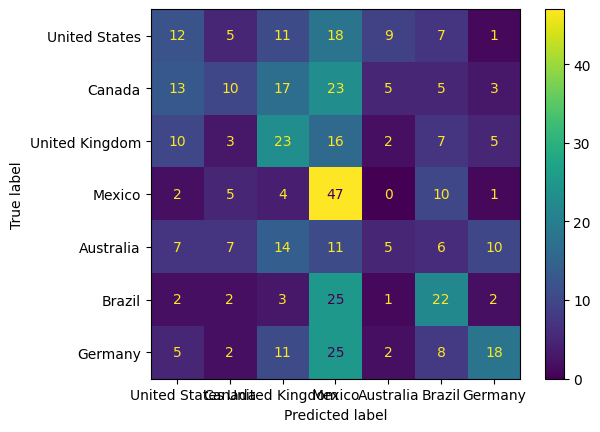

----------

----------
Stats for SVC
Accuracy score: 0.31601731601731603
Recall score: 0.31601731601731603
Precision score: 0.31601731601731603
F1 score: 0.31601731601731603


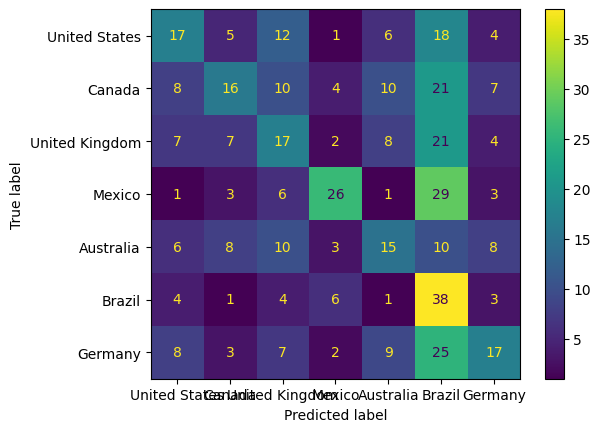

----------



In [ ]:
# 1.3 train model to predict location
df = pd.DataFrame.from_records(loc_filtered_data)
multiclass_train, multiclass_test = train_test_split(df[['text', 'location']], test_size=0.2)
print(multiclass_train.size, multiclass_test.size)

vectorizer = CountVectorizer(analyzer=stem_rmv_punc,
                             stop_words='english',
                             min_df=3)
multiclass_train_lemmatized = vectorizer.fit_transform(multiclass_train['text'])
multiclass_test_lemmatized = vectorizer.transform(multiclass_test['text'])

tfidf_transformer = TfidfTransformer()
multiclass_train_tfidf = tfidf_transformer.fit_transform(multiclass_train_lemmatized)
multiclass_test_tfidf = tfidf_transformer.transform(multiclass_test_lemmatized)


svd = TruncatedSVD(n_components=300, random_state=42)
multiclass_train_lsi = svd.fit_transform(multiclass_train_tfidf)
multiclass_test_lsi = svd.transform(multiclass_test_tfidf)

pipelines = [
    ('GaussianNB', Pipeline([('clf', GaussianNB())])),
    ('SVC', Pipeline([('clf', OneVsRestClassifier(SVC(kernel='linear', C=500, probability=True, class_weight='balanced')))]))
]

print('Ready to train model')

for title, pipeline in pipelines:
    multiclass_fit_predict_and_show_stats(pipeline,
                                        multiclass_train_lsi,
                                        multiclass_train['location'],
                                        multiclass_test_lsi,
                                        multiclass_test['location'],
                                        ACCEPTABLE,
                                        title)

##### Evaluation of prediction task
We showcased our models for the prediction tasks and displayed the accuracies and metrics for each of the trained model. We also used baseline models to compare our model accuracies and display the performance improvement.

Comparing across all 3 prediction tasks, the team prediction model perform dramatically better than the others, with team prediction LogisticRegression model having an accuracy of 68.4%, while the time period prediction GaussianNB model only has an accuracy of 41.8% and the location prediction SVC model has an extremely low accuracy of 31.6%. This is consistent with our expectations, as we expect there to be more defining features that can be picked up from the tweet contents to determine which team the person supports, less discerning features for time period, and much less features for where the user is from. Plus, the number of datapoints for each of the task is different as well, with way fewer datapoints for the location prediction task (only 330 datapoints per country) in the datasets. This can be attributed to the dataset, as the lack of a proper formatting for the location data meant that it was harder to find good training data for location prediction. Since country-named-entity-recognition is quite a rudimentary library to identify countries, a possible improvement would be to use a better NLP model to understand and find the location based on location data, or to use a tweet dataset that provides better formatted location information.

One curious finding from the confusion matrix of the location prediction models was that Mexico and Brazil classes seemed to be labeled correctly more often than the other classes. This could be due to languages used, since people from both countries both primarily use their own specific languages (Spanish for Mexicans, and Portuguese for Brazilians), and these different languages are learnt by the models. While Germany also has its own native language, based on the tweet dataset, the vast majority of German users still communicate using English. For a fairer comparison where language differences are eliminated, a future task could be to only perform prediction task on tweets that are in English.

#### 10.2 Tweet generation
Here we attempt to generate a tweet from a supporter of either team, both before and after the game.

Referencing https://wandb.ai/wandb/huggingtweets/reports/Hugging-Tweets-Train-a-Model-to-Generate-Tweets--VmlldzoxMTY5MjI, tweets are separated by special tokens '<|endoftext|>', so that the model treats each tweet as independent datapoints.

In [ ]:
def split_tweets_based(data):
    hawks_before, hawks_after, patriots_before, patriots_after = [], [], [], []
    for obj in data:
        if obj['team'] == 'hawks':
            if obj['time'] == 'before':
                hawks_before.append(obj['text'])
            elif obj['time'] == 'after':
                hawks_after.append(obj['text'])
        else:
            if obj['time'] == 'before':
                patriots_before.append(obj['text'])
            elif obj['time'] == 'after':
                patriots_after.append(obj['text'])
    return hawks_before, hawks_after, patriots_before, patriots_after

hawks_before, hawks_after, patriots_before, patriots_after = split_tweets_based(data)

In [ ]:
# if necessary
# !pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 1.8 MB/s eta 0:00:00a 0:00:01


In [ ]:
with open('hawks_before.txt', 'w') as f:
    f.write('\n'.join(hawks_before))
with open('hawks_after.txt', 'w') as f:
    f.write('\n'.join(hawks_after))
with open('patriots_before.txt', 'w') as f:
    f.write('\n'.join(patriots_before))
with open('patriots_after.txt', 'w') as f:
    f.write('\n'.join(patriots_after))

In [ ]:
# if necessary
#!pip3 install gpt-2-simple

  Using cached gpt_2_simple-0.8.1-py3-none-any.whl


Running this model took extremely long as we are performing fine-tuning on a large language model. While the rest of the notebook was run locally, the following code block was run specifically on Google Colab to make use of the free GPU resource.

In [ ]:
# from: https://github.com/minimaxir/gpt-2-simple
import gpt_2_simple as gpt2

datasets = ['hawks_before.txt', 'hawks_after.txt', 'patriots_before.txt', 'patriots_after.txt']

# use GPT with 124 million parameters
gpt2.download_gpt2(model_name="124M")
sess = gpt2.start_tf_sess()
# from: https://medium.com/@bijil.subhash/generating-tweets-using-gpt-2-d93e1a87105a
gpt2.finetune(sess,
            dataset=datasets[0],
            #dataset=datasets[1],
            #dataset=datasets[2],
            #dataset=datasets[3],
            model_name='124M',
            steps=40,
            restore_from='fresh',
            run_name='run1',
            print_every=10,
            sample_every=25,
            save_every=25
            )

# this was run on Google Colab due to the lack of a GPU on local env
# have to disconnect and start new runtime for each instance of gpt2, so that it can be finetuned with only the correct dataset

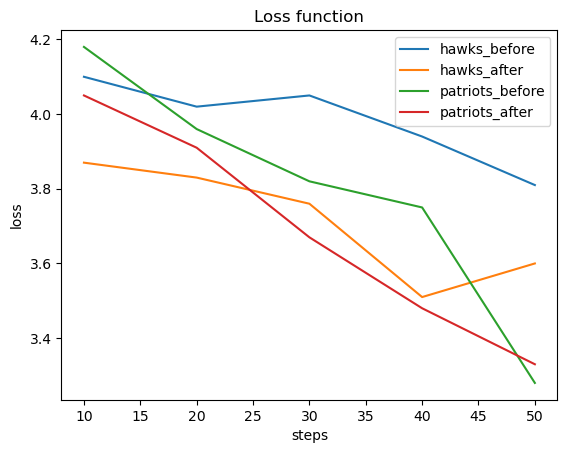

In [ ]:
import matplotlib.pyplot as plt

steps = [10, 20, 30, 40, 50]
loss = dict()
loss['hawks_before'] = [4.10, 4.02, 4.05, 3.94, 3.81]
loss['hawks_after'] = [3.87, 3.83, 3.76, 3.51, 3.60]
loss['patriots_before'] = [4.18, 3.96, 3.82, 3.75, 3.28]
loss['patriots_after'] = [4.05, 3.91, 3.67, 3.48, 3.33]

for k in loss:
    plt.plot(steps, loss[k], label=k)
    plt.title(f'Loss function')
    plt.legend(loc='upper right')
    plt.xlabel('steps')
    plt.ylabel('loss')
    plt.show

We plotted the loss functions for all 4 models. We experimented with different number of training steps, but after training multiple iterations of models on all 4 datasets, we notice that the loss functions generally plateau and begin to increase after 40-50 steps. Thus, we chose to train the models with 40 steps.

##### Generate tweets
For each fine-tuned model, we generate some tweets with the same style. We chose one tweet from the generated tweets for each model and copied them below.

In [ ]:
# generate tweet
generated = gpt2.generate(sess, temperature=0.7, return_as_list=True)
print(generated[0])

##### A representative generated tweet for each category

Hawks fan before game:
"I'm ready to scream my heart out!"

Hawks fan after game:
"Just wanted to say thank you for an awesome season. We'll be back"

Patriots fan before game:
"I am ready for the Super Bowl tonight!"

Patriots fan after game:
"PATRIOTS! AHHHHHHH PATRIOTS!!!"

##### Evaluation
We successfully fine-tuned models based on 4 specific datasets classified according to team supported and time period. The generated tweets showed that the fine-tuned model can generate tweets that somewhat showcase the unique identifiers of each dataset. Hawks and Patriots fans were all very excited coming into the game. After Patriots' win in the game, Patriots fans celebrated the win while Hawks fans suffered from the loss of their team. This aligns with the generated tweets.

Fine-tuning large language models took a lot of compute resources and time, which reduced our ability to do extra experimentation and improvements to the training / finetuning process. Nevertheless, we experimented with the number of steps to perform fine-tuning, and decided on the value of 40 across all 4 models. The loss function showed that the models were indeed training as expected.

Some future works would include experimenting with other LLM models, or even building our own rudimentary LLM from scratch. We also noticed that the training dataset still contained a lot of noise despite our attempts of doing data cleaning in the earlier sections (removing of hyperlinks, special escape characters etc.) so more improvements could be done on doing better cleaning of the dataset.